# The purpose of this project is to predict how much I'll spend McDonald based on attributes: Food Category and Month

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(".", "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Loading the data

In [2]:
pwd # My Notes: gets the current working directory

'c:\\Users\\Trogg\\Documents\\GitHub\\McDonald-Expenditure-'

Load the data

In [3]:
exp_dataset = pd.read_csv(r"C:\Users\Trogg\Documents\GitHub\McDonald-Expenditure-\Dataset\MoneyLover-2020-05-17.csv", 
                           sep = ";",
                           names = ['ID', 'Notes', 'Amount', 'Category', 'Account', 'Currency', 'Date', 'Event', 'Exclude Report'],
                           index_col='ID',
                           header=0)
exp_dataset.head()

# Laptop: r"C:\Users\Trogg\Documents\Python Scripts\ML_Projects\My Expenditure\Dataset\MoneyLover-2020-05-17.csv"
# Home Computer: C:\Users\Trogg\Documents\GitHub\McDonald-Expenditure-\Dataset\

,Notes,Amount,Category,Account,Currency,Date,Event,Exclude Report
ID,,,,,,,,
4996,Marigold yogurt savings,1.45,Gifts,Main Wallet,SGD,16/05/2020,No,NaN
4995,Marigold Na Ta Deco yogurt,-2.20,Food & Beverage,Main Wallet,SGD,16/05/2020,No,NaN
4994,Marigold Mixed Berry yogurt,-2.20,Food & Beverage,Main Wallet,SGD,16/05/2020,No,NaN
4993,Tong Garden Almond with Banana chip 140g,-4.90,Food & Beverage,Main Wallet,SGD,16/05/2020,No,NaN
4992,Sunshine White Bread 400g,-2.00,Food & Beverage,Main Wallet,SGD,16/05/2020,No,NaN


My Notes: Realize that there was loaded incorrectly and had 100+ missing values, had to use the `sep` function to seperate the values in the csv file

Extra: Using the `del` function to delete the unnecessary columns

In [4]:
# exp_dataset_example_1 = exp_dataset.copy()
# del exp_dataset_example_1["Account"]
# exp_dataset_example_1.head()

In [5]:
exp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4985 entries, 4996 to 3551
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Notes           4983 non-null   object 
 1   Amount          4985 non-null   float64
 2   Category        4985 non-null   object 
 3   Account         4985 non-null   object 
 4   Currency        4985 non-null   object 
 5   Date            4985 non-null   object 
 6   Event           4985 non-null   object 
 7   Exclude Report  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 350.5+ KB


Checking for null values

In [6]:
print("Number of null values for each column")
pd.DataFrame(exp_dataset.isnull().sum(), columns=["Null values"])

Number of null values for each column


,Null values
Notes,2
Amount,0
Category,0
Account,0
Currency,0
Date,0
Event,0
Exclude Report,4985


In [7]:
exp_dataset[exp_dataset["Notes"].isnull().values]

,Notes,Amount,Category,Account,Currency,Date,Event,Exclude Report
ID,,,,,,,,
2891,NaN,-45.00,Driving Lessons,Main Wallet,SGD,23/03/2015,No,NaN
3077,NaN,268.21,Salary,Main Wallet,SGD,10/12/2014,No,NaN


# Extra, unnecessary columns, Start

In [8]:
# My Notes: Fills missing values with "Main Wallet"
# exp_dataset[["Account"]].fillna(value="Main Wallet")

In [9]:
# My Notes: Checking the missing values of the Account
# exp_dataset[["Account"]].isnull().any(axis=1)

In [10]:
# exp_dataset[["Account"]]

# Extra for now, unnecessary columns, Stop

# Getting the most important columns

In [11]:
# new_exp_data = exp_dataset[["Food", "Amount", "Category", "Date"]]
exp_data_1 = pd.DataFrame(exp_dataset, columns=["Notes", "Amount", "Category", "Date"])
exp_data_1.head()

,Notes,Amount,Category,Date
ID,,,,
4996,Marigold yogurt savings,1.45,Gifts,16/05/2020
4995,Marigold Na Ta Deco yogurt,-2.20,Food & Beverage,16/05/2020
4994,Marigold Mixed Berry yogurt,-2.20,Food & Beverage,16/05/2020
4993,Tong Garden Almond with Banana chip 140g,-4.90,Food & Beverage,16/05/2020
4992,Sunshine White Bread 400g,-2.00,Food & Beverage,16/05/2020


In [12]:
exp_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4985 entries, 4996 to 3551
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Notes     4983 non-null   object 
 1   Amount    4985 non-null   float64
 2   Category  4985 non-null   object 
 3   Date      4985 non-null   object 
dtypes: float64(1), object(3)
memory usage: 194.7+ KB


Counts the number of rows for each `Category` and shows the top 5

In [13]:
exp_data_1["Category"].value_counts()[:5]

Food & Beverage    3631
Investment          529
Gifts               199
Transportation       95
Entertainment        87
Name: Category, dtype: int64

Checking for empty values

In [14]:
exp_data_1.isnull().sum()

Notes       2
Amount      0
Category    0
Date        0
dtype: int64

Getting the rows of the empty values in *Notes* category

In [15]:
exp_data_1.isnull().values

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       ...,
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [16]:
exp_data_1[exp_data_1.isnull().values.any(axis=1)]
# Alternative
# sample_incomplete_rows = exp_data_1[exp_data_1.isnull().any(axis=1)].head()

,Notes,Amount,Category,Date
ID,,,,
2891,NaN,-45.00,Driving Lessons,23/03/2015
3077,NaN,268.21,Salary,10/12/2014


My Notes: It's not related to Food & Beverage so I'll ignore it.

.values turns the **DataFrame into an array**

Need to get the **Food & Beverage Category only**

In [17]:
F_and_B = exp_data_1["Category"] == "Food & Beverage"
exp_data_1 = exp_data_1[F_and_B]
exp_data_1.head(10)

,Notes,Amount,Category,Date
ID,,,,
4995,Marigold Na Ta Deco yogurt,-2.20,Food & Beverage,16/05/2020
4994,Marigold Mixed Berry yogurt,-2.20,Food & Beverage,16/05/2020
4993,Tong Garden Almond with Banana chip 140g,-4.90,Food & Beverage,16/05/2020
4992,Sunshine White Bread 400g,-2.00,Food & Beverage,16/05/2020
4991,Stadia chicken patty 320g,-4.85,Food & Beverage,16/05/2020
4990,Nscafe Hazelnut Coffee,-6.95,Food & Beverage,16/05/2020
4989,D-plus Hokkaido bun,-1.30,Food & Beverage,16/05/2020
4988,D-plus Hokkaido bun,-1.30,Food & Beverage,16/05/2020
4987,Crunchy first baby butterhead lettuce 160g,-2.85,Food & Beverage,16/05/2020


Alternative Method

In [18]:
# F_and_B = "Food & Beverage"
# exp_data_1.query("Category == @F_and_B")

Checking for empty values

In [19]:
# My Notes:
# pd.DataFrame(exp_data_1.stack(), columns=["Info"]).head(n=20)
exp_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3631 entries, 4995 to 3546
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Notes     3631 non-null   object 
 1   Amount    3631 non-null   float64
 2   Category  3631 non-null   object 
 3   Date      3631 non-null   object 
dtypes: float64(1), object(3)
memory usage: 141.8+ KB


In [20]:
exp_data_1.isnull().sum()

# My Notes: No empty values found

Notes       0
Amount      0
Category    0
Date        0
dtype: int64

In [21]:
exp_data_1["Notes"].describe()

count                           3631
unique                          1152
top       Marigold Na Ta Deco yogurt
freq                             128
Name: Notes, dtype: object

Convet the negative values in Amount Category to positive using `abs` function

In [22]:
exp_data_1["Amount"] = exp_data_1["Amount"].abs()
exp_data_1[:5]

,Notes,Amount,Category,Date
ID,,,,
4995,Marigold Na Ta Deco yogurt,2.20,Food & Beverage,16/05/2020
4994,Marigold Mixed Berry yogurt,2.20,Food & Beverage,16/05/2020
4993,Tong Garden Almond with Banana chip 140g,4.90,Food & Beverage,16/05/2020
4992,Sunshine White Bread 400g,2.00,Food & Beverage,16/05/2020
4991,Stadia chicken patty 320g,4.85,Food & Beverage,16/05/2020


# Getting the Date time

Getting only the column of category `date`. Note that the `dtype` is an object not **`datetime64[ns]`**

In [23]:
exp_data_1["Date"]

ID
4995    16/05/2020
4994    16/05/2020
4993    16/05/2020
4992    16/05/2020
4991    16/05/2020
           ...    
3540    12/04/2014
3550    10/04/2014
3549    10/04/2014
3548    10/04/2014
3546    10/04/2014
Name: Date, Length: 3631, dtype: object

Getting the first and last dates and converting it to `datetime64[ns]` format

**Please Note**: The reason the length is showing 2229 instead of 3631 is because the duplicate values are not shown compared to `exp_data_1["Date"]`

You are specifying the *date range* not adding the values to the column ["Date"] in `exp_data_1`

In [24]:
# First_Date = pd.to_datetime(exp_data_1["Date"].iloc[-1], format="%d/%m/%Y") #Alternative
First_Date = pd.to_datetime(exp_data_1["Date"], dayfirst=True).iloc[-1]
Last_Date = pd.to_datetime(exp_data_1["Date"], dayfirst=True).iloc[0]
print("First Date:",First_Date)
print("Last Date:", Last_Date)

# print("Length of rows:",len(pd.date_range(start=First_Date, end=Last_Date, freq="D")))
# print("First date:", First_Date_Eg)
# print("Last date:", Last_Date_Eg)

First Date: 2014-04-10 00:00:00
Last Date: 2020-05-16 00:00:00


## Creating the Quarterly Periods column

## Alternative Start

In [25]:
# Exp_Quarterly = pd.date_range(start=First_Date, end=Last_Date, freq="Q")
# Exp_Q = pd.DataFrame(Exp_Quarterly, columns=["Period"])
# Exp_Q.head()

In [26]:
# Exp_Q.loc[0]

In [27]:
# Total_Rows = Exp_Q["Period"].value_counts().sum()
# Total_Rows

In [28]:
# Exp_Q.loc[0] < Exp_Q.loc[1]

## Alternative End

Converting the date category in exp_data_1 from **Object to DateTime** 

In [29]:
All_Date = pd.to_datetime(exp_data_1["Date"], dayfirst=True)
All_Date

ID
4995   2020-05-16
4994   2020-05-16
4993   2020-05-16
4992   2020-05-16
4991   2020-05-16
          ...    
3540   2014-04-12
3550   2014-04-10
3549   2014-04-10
3548   2014-04-10
3546   2014-04-10
Name: Date, Length: 3631, dtype: datetime64[ns]

Add the converted All_Date to Date column in exp_data_1

In [30]:
exp_data_1["Date"] = All_Date
exp_data_1

,Notes,Amount,Category,Date
ID,,,,
4995,Marigold Na Ta Deco yogurt,2.20,Food & Beverage,2020-05-16
4994,Marigold Mixed Berry yogurt,2.20,Food & Beverage,2020-05-16
4993,Tong Garden Almond with Banana chip 140g,4.90,Food & Beverage,2020-05-16
4992,Sunshine White Bread 400g,2.00,Food & Beverage,2020-05-16
4991,Stadia chicken patty 320g,4.85,Food & Beverage,2020-05-16
...,...,...,...,...
3540,Kinder Buneo,3.60,Food & Beverage,2014-04-12
3550,Yogurt drink,1.35,Food & Beverage,2014-04-10
3549,Baked Almond,2.50,Food & Beverage,2014-04-10


## Creating the Quarterly, Monthly and Daily period columns

## For Quarterly

In [31]:
exp_data_1_date = exp_data_1.copy()
exp_date_quarterly = exp_data_1_date["Date"].dt.to_period("Q")
exp_date_quarterly

ID
4995    2020Q2
4994    2020Q2
4993    2020Q2
4992    2020Q2
4991    2020Q2
         ...  
3540    2014Q2
3550    2014Q2
3549    2014Q2
3548    2014Q2
3546    2014Q2
Name: Date, Length: 3631, dtype: period[Q-DEC]

In [32]:
exp_date_quarterly.unique()

<PeriodArray>
['2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4',
 '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1',
 '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2',
 '2015Q1', '2014Q4', '2014Q3', '2014Q2']
Length: 25, dtype: period[Q-DEC]

## For monthly

In [33]:
exp_date_monthly = exp_data_1_date["Date"].dt.month
np.sort(pd.unique(exp_date_monthly))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [34]:
exp_date_monthly

ID
4995    5
4994    5
4993    5
4992    5
4991    5
       ..
3540    4
3550    4
3549    4
3548    4
3546    4
Name: Date, Length: 3631, dtype: int64

Check for duplicate values

In [35]:
exp_date_monthly[exp_date_monthly.duplicated(keep=False)]

ID
4995    5
4994    5
4993    5
4992    5
4991    5
       ..
3540    4
3550    4
3549    4
3548    4
3546    4
Name: Date, Length: 3631, dtype: int64

Converting the int to their month names

In [36]:
month_names = All_Date.dt.month_name().values
month_names

array(['May', 'May', 'May', ..., 'April', 'April', 'April'], dtype=object)

## For each day

Converting the `array` to `series` and getting the `day of the week`

In [37]:
exp_date_days_1 = exp_data_1_date["Date"].dt.dayofweek + 1
exp_date_days_1
# print("Number of days:",len(exp_date_days_1))

ID
4995    6
4994    6
4993    6
4992    6
4991    6
       ..
3540    6
3550    4
3549    4
3548    4
3546    4
Name: Date, Length: 3631, dtype: int64

In [38]:
np.sort(pd.unique(exp_date_days_1))

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

Mon: 1

Tue: 2

Wed: 3

Thu: 4

Fri: 5

Sat: 6

Sun: 7

## Creating the Yearly Column

In [39]:
exp_date_yearly = exp_data_1_date["Date"].dt.year
exp_date_yearly

ID
4995    2020
4994    2020
4993    2020
4992    2020
4991    2020
        ... 
3540    2014
3550    2014
3549    2014
3548    2014
3546    2014
Name: Date, Length: 3631, dtype: int64

In [40]:
# My Notes: Gets the months name
# exp_date_test_monthly = exp_data_1_date_test["Date"].dt.month_name()

In [41]:
# My Notes: Delete the incorrectly named column
# del exp_data_1["Quartery Period"]

## Alternative Start

Converting `exp_date_monthly` column to String

In [42]:
# Q_Period_Str = pd.DataFrame(data=exp_date_quarterly, dtype=np.str)
# Q_Period_Str["Date"]

Adding exp_date_test back into exp_data_1 date columns as Quarterly Period

In [43]:
# exp_data_1["Quarterly Period"] = Q_Period_Str["Date"]
# exp_data_1

## Alternative End

## Insert the Days, Month, Quarterly Period and Year columns into the orginal dataset

Delete the columns if necessary

In [44]:
# del exp_data_1["Month"]
# del exp_data_1["Day"]

In [45]:
exp_data_1.insert(3, "Day", exp_date_days_1)

In [46]:
exp_data_1.insert(4, "Month", exp_date_monthly)

In [47]:
exp_data_1.insert(5, "Quarterly Period", exp_date_quarterly)

In [48]:
exp_data_1.insert(6, "Year", exp_date_yearly)

In [49]:
exp_data_1

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4995,Marigold Na Ta Deco yogurt,2.20,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4994,Marigold Mixed Berry yogurt,2.20,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4993,Tong Garden Almond with Banana chip 140g,4.90,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4992,Sunshine White Bread 400g,2.00,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4991,Stadia chicken patty 320g,4.85,Food & Beverage,6,5,2020Q2,2020,2020-05-16
...,...,...,...,...,...,...,...,...
3540,Kinder Buneo,3.60,Food & Beverage,6,4,2014Q2,2014,2014-04-12
3550,Yogurt drink,1.35,Food & Beverage,4,4,2014Q2,2014,2014-04-10
3549,Baked Almond,2.50,Food & Beverage,4,4,2014Q2,2014,2014-04-10


Deleting `Category`, will create a new category

In [50]:
# del exp_data_1["Category"]

In [51]:
exp_data_1.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4995,Marigold Na Ta Deco yogurt,2.20,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4994,Marigold Mixed Berry yogurt,2.20,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4993,Tong Garden Almond with Banana chip 140g,4.90,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4992,Sunshine White Bread 400g,2.00,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4991,Stadia chicken patty 320g,4.85,Food & Beverage,6,5,2020Q2,2020,2020-05-16


In [52]:
exp_data_1.drop("Date", axis=1)

,Notes,Amount,Category,Day,Month,Quarterly Period,Year
ID,,,,,,,
4995,Marigold Na Ta Deco yogurt,2.20,Food & Beverage,6,5,2020Q2,2020
4994,Marigold Mixed Berry yogurt,2.20,Food & Beverage,6,5,2020Q2,2020
4993,Tong Garden Almond with Banana chip 140g,4.90,Food & Beverage,6,5,2020Q2,2020
4992,Sunshine White Bread 400g,2.00,Food & Beverage,6,5,2020Q2,2020
4991,Stadia chicken patty 320g,4.85,Food & Beverage,6,5,2020Q2,2020
...,...,...,...,...,...,...,...
3540,Kinder Buneo,3.60,Food & Beverage,6,4,2014Q2,2014
3550,Yogurt drink,1.35,Food & Beverage,4,4,2014Q2,2014
3549,Baked Almond,2.50,Food & Beverage,4,4,2014Q2,2014


In [53]:
exp_data_1

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4995,Marigold Na Ta Deco yogurt,2.20,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4994,Marigold Mixed Berry yogurt,2.20,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4993,Tong Garden Almond with Banana chip 140g,4.90,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4992,Sunshine White Bread 400g,2.00,Food & Beverage,6,5,2020Q2,2020,2020-05-16
4991,Stadia chicken patty 320g,4.85,Food & Beverage,6,5,2020Q2,2020,2020-05-16
...,...,...,...,...,...,...,...,...
3540,Kinder Buneo,3.60,Food & Beverage,6,4,2014Q2,2014,2014-04-12
3550,Yogurt drink,1.35,Food & Beverage,4,4,2014Q2,2014,2014-04-10
3549,Baked Almond,2.50,Food & Beverage,4,4,2014Q2,2014,2014-04-10


## (Extra) Moving the Quarterly Period column 

In [54]:
# Q_Period_col = exp_data_1.pop("Quarterly Period")
# Q_Period_col

In [55]:
# exp_data_1.insert(5, "Quarterly Period", Q_Period_col)
# exp_data_1

Rename the column name

In [56]:
# exp_data_1.rename(columns={"Month":"Monthly"}, inplace=True)

In [57]:
# exp_data_1

# Getting the McDonald's Food

Objective: Predict the `Month` amount you'll spend in the future

In [58]:
McDonald_Exp = exp_data_1[exp_data_1["Notes"].str.contains("McDonald", case=False, regex=False)]
McDonald_Exp.sort_index()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
19,McDonald's Filet O Fish Burger,2.80,Food & Beverage,5,4,2019Q2,2019,2019-04-12
21,McDonald's McChicken Burger,2.00,Food & Beverage,4,4,2019Q2,2019,2019-04-11
34,McDonald's cheese burger,2.30,Food & Beverage,1,4,2019Q2,2019,2019-04-08
51,McDonald's sweet chili fish burger,6.00,Food & Beverage,5,4,2019Q2,2019,2019-04-05
52,McDonald's small fries,1.50,Food & Beverage,5,4,2019Q2,2019,2019-04-05
...,...,...,...,...,...,...,...,...
4806,McDonald's double cheese Burger,3.90,Food & Beverage,3,3,2020Q1,2020,2020-03-25
4828,McDonald's sausage egg McGriddle,3.50,Food & Beverage,2,3,2020Q1,2020,2020-03-31
4844,McDonald's Filet O Fish Burger,2.00,Food & Beverage,7,4,2020Q2,2020,2020-04-05


In [59]:
print("Number of rows in McDonald_Exp:", len(McDonald_Exp))

Number of rows in McDonald_Exp: 223


Checking for duplicate values in `MacDonald_Exp`

In [60]:
McDonald_Exp[McDonald_Exp.duplicated(keep=False).values]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,


Checking for **null values** in `McDonald_Exp`

In [61]:
McDonald_Exp[McDonald_Exp.isnull().values.any(axis=1)]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,


# Adding the different categories

Adding the different food categories: Fish burger, Chicken Burger, Sausages, Beef, Dessert

## Fish Burgers

In [62]:
McDonald_FishBurger = McDonald_Exp[McDonald_Exp["Notes"].str.contains("Fish", case=False)].copy()
# McDonald_FishBurger.reset_index(inplace=True)

In [63]:
# McDonald_FishBurger = McDonald_FishBurger.copy()

In [64]:
McDonald_FishBurger["Notes"].value_counts()

McDonald's Filet O Fish Burger                          28
McDonald's Double Filet O Fish                          10
McDonald's Double Filet O Fish meal                      3
Mcdonald filet fish Burger                               1
McDonald's Filet O Fish meal                             1
McDonald's Filet O Fish meal with criss cut fries        1
Sentosa McDonald's double file o fish                    1
McDonald's nacho fillet fish                             1
McDonald's Chili Lime Fish Burger                        1
Mcdonald double fillet o fish meal                       1
McDonald's double Nacho fillet fish                      1
McDonald's sweet chili fish burger                       1
McDonald's Double Filet O Fish meal with curly fries     1
Name: Notes, dtype: int64

Adding `Fish` into `Category`

In [65]:
McDonald_FishBurger.loc[:, "Category"] = "Fish"
McDonald_FishBurger.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4844,McDonald's Filet O Fish Burger,2.00,Fish,7,4,2020Q2,2020,2020-04-05
4617,McDonald's Filet O Fish Burger,2.95,Fish,5,2,2020Q1,2020,2020-02-07
4584,McDonald's Filet O Fish Burger,2.80,Fish,2,1,2020Q1,2020,2020-01-28
4551,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020,2020-01-17
4497,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020,2020-01-03


In [66]:
# del McDonald_FishBurger["New_Cat"]
# McDonald_FishBurger.head()

In [67]:
McDonald_FishBurger["Notes"].value_counts()

McDonald's Filet O Fish Burger                          28
McDonald's Double Filet O Fish                          10
McDonald's Double Filet O Fish meal                      3
Mcdonald filet fish Burger                               1
McDonald's Filet O Fish meal                             1
McDonald's Filet O Fish meal with criss cut fries        1
Sentosa McDonald's double file o fish                    1
McDonald's nacho fillet fish                             1
McDonald's Chili Lime Fish Burger                        1
Mcdonald double fillet o fish meal                       1
McDonald's double Nacho fillet fish                      1
McDonald's sweet chili fish burger                       1
McDonald's Double Filet O Fish meal with curly fries     1
Name: Notes, dtype: int64

In [68]:
unique_fish = pd.unique(McDonald_FishBurger["Notes"])

In [69]:
no_fish = len(McDonald_FishBurger)

In [70]:
print("Number of fish burger meals:", no_fish)

Number of fish burger meals: 51


## Chicken Burgers

In [71]:
McDonald_ChickenBurger = McDonald_Exp[McDonald_Exp["Notes"].str.contains("Chicken|nuggets|Mcnugget|mcwings|mcspicy|nasi lemak|Ha Ha", case=False, regex=True)].copy()
# McDonald_ChickenBurger.reset_index(inplace=True)

In [72]:
# McDonald_ChickenBurger = McDonald_ChickenBurger.copy()

In [73]:
McDonald_ChickenBurger.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4698,McDonald's 4pc nuggets app offer,1.0,Food & Beverage,1,2,2020Q1,2020,2020-02-24
4697,McDonald's McChicken Burger,2.0,Food & Beverage,1,2,2020Q1,2020,2020-02-24
4290,McDonald's 4pc nuggets app offer,1.0,Food & Beverage,1,11,2019Q4,2019,2019-11-04
4195,McDonald's McChicken Burger,2.0,Food & Beverage,2,10,2019Q4,2019,2019-10-08
4070,McDonald's 4pc nuggets app offer,1.0,Food & Beverage,1,9,2019Q3,2019,2019-09-02


Adding the `Chicken` into `Category`

In [74]:
McDonald_ChickenBurger.loc[:, "Category"] = "Chicken"
McDonald_ChickenBurger.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4698,McDonald's 4pc nuggets app offer,1.0,Chicken,1,2,2020Q1,2020,2020-02-24
4697,McDonald's McChicken Burger,2.0,Chicken,1,2,2020Q1,2020,2020-02-24
4290,McDonald's 4pc nuggets app offer,1.0,Chicken,1,11,2019Q4,2019,2019-11-04
4195,McDonald's McChicken Burger,2.0,Chicken,2,10,2019Q4,2019,2019-10-08
4070,McDonald's 4pc nuggets app offer,1.0,Chicken,1,9,2019Q3,2019,2019-09-02


In [75]:
McDonald_ChickenBurger["Notes"].value_counts().sum()

105

Drop `herb chicken pie`

In [76]:
herb_chicken_pie = McDonald_ChickenBurger[McDonald_ChickenBurger["Notes"].str.contains("herb chicken", case=False)]
herb_chicken_pie

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
674,McDonald's herb chicken pie,1.8,Chicken,5,10,2018Q4,2018,2018-10-12


In [77]:
McDonald_ChickenBurger = McDonald_ChickenBurger.drop(herb_chicken_pie.index)

In [78]:
McDonald_ChickenBurger["Notes"].value_counts()

McDonald's McChicken Burger                                42
McDonald's mcwings                                         11
McDonald's 2pc mcwings                                     10
McDonald's McChicken cheese meal                            5
McDonald's Grill Chicken McWrap                             5
McDonald's 4pc mcwings                                      4
McDonald's 4pc nuggets app offer                            4
McDonald's McChicken Burger with cheese                     2
McDonald's chicken muffin and hashbrown.                    2
McDonald's McChicken cheese                                 2
McDonald's chicken muffin with egg                          1
McDonald's chicken burger and 2pc mcwings                   1
McDonald's chicken muffin with egg meal                     1
McDonald's nasi lemak burger                                1
McDonald's double mcspicy meal                              1
McDonald's McChicken Burger and apple pie                   1
McDonald

In [79]:
unique_chicken = pd.unique(McDonald_ChickenBurger["Notes"])

In [80]:
no_chicken= len(McDonald_ChickenBurger)

In [81]:
print("Number of chicken burger meals:",no_chicken)

Number of chicken burger meals: 104


## For Sausages

In [82]:
McDonald_Sausage = McDonald_Exp[McDonald_Exp["Notes"].str.contains("sausage| Mcmuffin stack|Egg Muffin", case=False)].copy()
# McDonald_Sausage.reset_index(inplace=True)

In [83]:
McDonald_Sausage.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4972,McDonald's breakfast wrap sausage,4.65,Food & Beverage,2,5,2020Q2,2020,2020-05-12
4868,McDonald's sausage egg McGriddle,3.50,Food & Beverage,1,4,2020Q2,2020,2020-04-13
4828,McDonald's sausage egg McGriddle,3.50,Food & Beverage,2,3,2020Q1,2020,2020-03-31
4786,McDonald's sausage egg McGriddle,3.50,Food & Beverage,5,3,2020Q1,2020,2020-03-20
4702,McDonald's sausage egg mcmuffin,3.90,Food & Beverage,5,2,2020Q1,2020,2020-02-28


In [84]:
McDonald_Sausage["Notes"].value_counts()

McDonald's sausage mcmuffin                                         5
McDonald's sausage egg McGriddle                                    4
McDonald's sausage Breakfast wrap                                   3
McDonald's sausage with egg muffin and medium sized orange juice    2
McDonald's sausage egg mcmuffin                                     2
McDonald's breakfast wrap sausage                                   2
McDonald's sausage mcmuffin with egg                                1
McDonald's Mcmuffin stack meal                                      1
McDonald's sausage mcmuffin meal                                    1
McDonald's sausage with egg muffin and small sized orange juice     1
McDonald's Egg Muffin                                               1
Name: Notes, dtype: int64

Adding the `sausage` into `category`

In [85]:
McDonald_Sausage.loc[:, "Category"] = "Sausage"
McDonald_Sausage.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4972,McDonald's breakfast wrap sausage,4.65,Sausage,2,5,2020Q2,2020,2020-05-12
4868,McDonald's sausage egg McGriddle,3.50,Sausage,1,4,2020Q2,2020,2020-04-13
4828,McDonald's sausage egg McGriddle,3.50,Sausage,2,3,2020Q1,2020,2020-03-31
4786,McDonald's sausage egg McGriddle,3.50,Sausage,5,3,2020Q1,2020,2020-03-20
4702,McDonald's sausage egg mcmuffin,3.90,Sausage,5,2,2020Q1,2020,2020-02-28


In [86]:
unique_sausage = pd.unique(McDonald_Sausage["Notes"])

In [87]:
no_sausage = len(McDonald_Sausage)

In [88]:
print("Number of sausage meals:", no_sausage)

Number of sausage meals: 23


## For Beef Burgers

In [89]:
McDonald_Beef = McDonald_Exp[McDonald_Exp["Notes"].str.contains("double cheese|quarter|cheese burger|big mac|mcdouble|sausage muffin", case=False)].copy()
# McDonald_Beef.reset_index(inplace=True)

In [90]:
McDonald_Beef.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4806,McDonald's double cheese Burger,3.9,Food & Beverage,3,3,2020Q1,2020,2020-03-25
4509,McDonald's double cheese Burger,3.9,Food & Beverage,2,1,2020Q1,2020,2020-01-07
3589,McDonald's cheese burger,2.3,Food & Beverage,2,4,2019Q2,2019,2019-04-23
34,McDonald's cheese burger,2.3,Food & Beverage,1,4,2019Q2,2019,2019-04-08
149,McDonald's double cheese Burger,3.5,Food & Beverage,5,3,2019Q1,2019,2019-03-08


Adding the `beef` into `category `

In [91]:
McDonald_Beef.loc[:, "Category"] = "Beef"
McDonald_Beef.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4806,McDonald's double cheese Burger,3.9,Beef,3,3,2020Q1,2020,2020-03-25
4509,McDonald's double cheese Burger,3.9,Beef,2,1,2020Q1,2020,2020-01-07
3589,McDonald's cheese burger,2.3,Beef,2,4,2019Q2,2019,2019-04-23
34,McDonald's cheese burger,2.3,Beef,1,4,2019Q2,2019,2019-04-08
149,McDonald's double cheese Burger,3.5,Beef,5,3,2019Q1,2019,2019-03-08


In [92]:
McDonald_Beef["Notes"].value_counts()

McDonald's double cheese Burger                     13
McDonald's cheese burger                             6
McDonald's double cheese Burger meal                 3
McDonald Double Cheese Burger meal                   2
McDonald's Big mac meal                              2
McDonald's McChicken with cheese burger              1
McDonald's Big Mac Meal                              1
Mcdonald double cheese Burger                        1
Mcdonald double quarter pounder with cheese meal     1
McDonald's mcdouble burger                           1
McDonald's Big mac                                   1
Name: Notes, dtype: int64

In [93]:
unique_beef = pd.unique(McDonald_Beef["Notes"])

In [94]:
no_beef = len(McDonald_Beef) 

In [95]:
print("Number of beef burgers:", no_beef)

Number of beef burgers: 32


## For Desserts

In [96]:
McDonald_Desserts = McDonald_Exp[McDonald_Exp["Notes"].str.contains("apple|peach|strawberry|mango|chicken pie|fries|sundae|hashbrown|ice cream",case=False)].copy()
# McDonald_Desserts.reset_index(inplace=True)

In [97]:
McDonald_Desserts.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4677,McDonald's hashbrown,1.9,Food & Beverage,4,2,2020Q1,2020,2020-02-20
4498,McDonald's mango passion pie,1.5,Food & Beverage,5,1,2020Q1,2020,2020-01-03
4196,McDonald's strawberry cream pie,1.5,Food & Beverage,2,10,2019Q4,2019,2019-10-08
4069,McDonald's vanilla ice cream,0.8,Food & Beverage,1,9,2019Q3,2019,2019-09-02
4051,McDonald's apple pie,1.2,Food & Beverage,2,8,2019Q3,2019,2019-08-27


Adding `Desserts` into `Category`

In [98]:
McDonald_Desserts.loc[:, "Category"] = "Desserts"
McDonald_Desserts.head()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4677,McDonald's hashbrown,1.9,Desserts,4,2,2020Q1,2020,2020-02-20
4498,McDonald's mango passion pie,1.5,Desserts,5,1,2020Q1,2020,2020-01-03
4196,McDonald's strawberry cream pie,1.5,Desserts,2,10,2019Q4,2019,2019-10-08
4069,McDonald's vanilla ice cream,0.8,Desserts,1,9,2019Q3,2019,2019-09-02
4051,McDonald's apple pie,1.2,Desserts,2,8,2019Q3,2019,2019-08-27


In [99]:
McDonald_Exp[McDonald_Exp["Notes"].str.contains("apple|peach|strawberry|mango|chicken pie|fries|sundae|hashbrown|ice cream", 
                                                case=False)]["Notes"].value_counts()

McDonald's apple pie                                    5
McDonald's chicken muffin and hashbrown.                2
McDonald's small fries                                  2
McDonald's McChicken Burger and apple pie               1
McDonald's herb chicken pie                             1
McDonald's Filet O Fish meal with criss cut fries       1
McDonald's strawberry sundae                            1
McDonald's mango passion pie                            1
McDonald's vanilla ice cream                            1
McDonald's strawberry cream pie                         1
McDonald's McChicken Burger meal with twister fries     1
McDonald's peach pie                                    1
McDonald's Double Filet O Fish meal with curly fries    1
McDonald's hashbrown                                    1
Name: Notes, dtype: int64

In [100]:
unique_dessert= pd.unique(McDonald_Desserts["Notes"])

In [101]:
no_desserts = len(McDonald_Desserts)

In [102]:
print("Total number of McDonald_Desserts:",no_desserts)

Total number of McDonald_Desserts: 20


In [103]:
Frames = [McDonald_FishBurger, McDonald_ChickenBurger, McDonald_Sausage, McDonald_Beef, McDonald_Desserts]

In [104]:
Combined_Food_Cat = pd.concat(Frames)
Combined_Food_Cat.sort_values(by="ID",ascending=False)

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4972,McDonald's breakfast wrap sausage,4.65,Sausage,2,5,2020Q2,2020,2020-05-12
4868,McDonald's sausage egg McGriddle,3.50,Sausage,1,4,2020Q2,2020,2020-04-13
4844,McDonald's Filet O Fish Burger,2.00,Fish,7,4,2020Q2,2020,2020-04-05
4828,McDonald's sausage egg McGriddle,3.50,Sausage,2,3,2020Q1,2020,2020-03-31
4806,McDonald's double cheese Burger,3.90,Beef,3,3,2020Q1,2020,2020-03-25
...,...,...,...,...,...,...,...,...
52,McDonald's small fries,1.50,Desserts,5,4,2019Q2,2019,2019-04-05
51,McDonald's sweet chili fish burger,6.00,Fish,5,4,2019Q2,2019,2019-04-05
34,McDonald's cheese burger,2.30,Beef,1,4,2019Q2,2019,2019-04-08


In [105]:
Combined_Food_Cat["Category"].value_counts()

Chicken     104
Fish         51
Beef         32
Sausage      23
Desserts     20
Name: Category, dtype: int64

## Extra

Outputting `Combined_Food_Cat` into csv. Have to try to use excel to see where are the duplicate values

In [106]:
# Combined_Food_Cat.to_csv(path_or_buf=r"D:\TV Shows\Machine Learning and Deep Learning\ML_Projects\My Expenditure\Dataset\Combined_Food_Cat.csv",
#          columns=["Notes" , "Amount", "Day", "Month", "Quarterly Period", "Year", "Date", "Category"])

**In the data frames there are some food that repeat themselves which is why there are duplicates.**

Overlapping keywords for each category:

Fish:

Chicken: McChicken, fries, chicken pie

Sausage: 

Beef:

Desserts: fries, pie

**First**,

Resolve the strings with `herb chicken pie`. It'll be classsified under *deserts*.

**Second**,

Add the following strings with `apple`, `peach`, `strawberry`, `mango` to *dessert* categories

**Third**,

1) Need to get rid of the duplicate values in *duplicate values*.




In [107]:
print("Total number of meals in Combine_Food_Cat:",len(Combined_Food_Cat))

Total number of meals in Combine_Food_Cat: 230


In [108]:
print("Total number of meals in all categories:", no_fish + no_chicken + no_sausage + no_beef + no_desserts)

Total number of meals in all categories: 230


In [109]:
print("Total number of rows in McDonald_Exp:", len(McDonald_Exp))

Total number of rows in McDonald_Exp: 223


Checking `Food & Beverage` in `Combined_Food_Cat`

In [110]:
Combined_Food_Cat[Combined_Food_Cat["Category"] == "Food & Beverage"]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,


Checking for **duplicate values** in `Combined_Food_Cat`

In [111]:
Combined_Food_Cat[Combined_Food_Cat.index.duplicated(keep=False)].sort_index()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
307,McDonald's McChicken Burger meal with twister ...,5.7,Chicken,2,1,2019Q1,2019,2019-01-29
307,McDonald's McChicken Burger meal with twister ...,5.7,Desserts,2,1,2019Q1,2019,2019-01-29
783,McDonald's McChicken Burger and apple pie,3.0,Chicken,1,9,2018Q3,2018,2018-09-10
783,McDonald's McChicken Burger and apple pie,3.0,Desserts,1,9,2018Q3,2018,2018-09-10
841,McDonald's Filet O Fish meal with criss cut fries,5.7,Fish,6,8,2018Q3,2018,2018-08-25
841,McDonald's Filet O Fish meal with criss cut fries,5.7,Desserts,6,8,2018Q3,2018,2018-08-25
2113,McDonald's McChicken with cheese burger,2.6,Chicken,3,2,2017Q1,2017,2017-02-08
2113,McDonald's McChicken with cheese burger,2.6,Beef,3,2,2017Q1,2017,2017-02-08
2676,McDonald's Double Filet O Fish meal with curly...,7.4,Fish,4,8,2015Q3,2015,2015-08-06


There are 7 duplicates found in `Combined_Cat_Food`. Need to remove them.

Checking for **missing values** in `Combined_Food_Cat`

In [112]:
Combined_Food_Cat[Combined_Food_Cat.isnull().values.any(axis=1)]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,


Checking if all the categories add up

In [113]:
Combined_Food_Cat["Category"].value_counts()

Chicken     104
Fish         51
Beef         32
Sausage      23
Desserts     20
Name: Category, dtype: int64

In [114]:
no_chicken

104

In [115]:
no_fish

51

In [116]:
no_beef

32

In [117]:
no_sausage

23

In [118]:
no_desserts

20

Checking if the amount for `Combined_Food_Cat` and `McDonald_Exp` are the same

In [119]:
print("Total amount spent for Combined_Food_Cat:",Combined_Food_Cat["Amount"].sum())

Total amount spent for Combined_Food_Cat: 801.3


In [120]:
print("Total amount spent for McDonald_Exp:",McDonald_Exp["Amount"].sum())

Total amount spent for McDonald_Exp: 769.0999999999999


## Removing duplicate values in `Combined_Food_Cat`

In [121]:
duplicate_values = Combined_Food_Cat[Combined_Food_Cat.index.duplicated(keep=False)].sort_index()
# Extra
# Combined_Food_Cat[Combined_Food_Cat.index.duplicated(keep=False)].sort_index()
non_duplicate_values = duplicate_values.iloc[::2, :]

**Important**: Need to add `sort_index()` if not it'll skip the duplicates ID

In [122]:
duplicate_values

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
307,McDonald's McChicken Burger meal with twister ...,5.7,Chicken,2,1,2019Q1,2019,2019-01-29
307,McDonald's McChicken Burger meal with twister ...,5.7,Desserts,2,1,2019Q1,2019,2019-01-29
783,McDonald's McChicken Burger and apple pie,3.0,Chicken,1,9,2018Q3,2018,2018-09-10
783,McDonald's McChicken Burger and apple pie,3.0,Desserts,1,9,2018Q3,2018,2018-09-10
841,McDonald's Filet O Fish meal with criss cut fries,5.7,Fish,6,8,2018Q3,2018,2018-08-25
841,McDonald's Filet O Fish meal with criss cut fries,5.7,Desserts,6,8,2018Q3,2018,2018-08-25
2113,McDonald's McChicken with cheese burger,2.6,Chicken,3,2,2017Q1,2017,2017-02-08
2113,McDonald's McChicken with cheese burger,2.6,Beef,3,2,2017Q1,2017,2017-02-08
2676,McDonald's Double Filet O Fish meal with curly...,7.4,Fish,4,8,2015Q3,2015,2015-08-06


An example of an duplicate

In [123]:
Combined_Food_Cat.loc[307]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
307,McDonald's McChicken Burger meal with twister ...,5.7,Chicken,2,1,2019Q1,2019,2019-01-29
307,McDonald's McChicken Burger meal with twister ...,5.7,Desserts,2,1,2019Q1,2019,2019-01-29


In [124]:
# non_duplicate_values = non_duplicate_values.drop(index=[219,223])
non_duplicate_values

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
307,McDonald's McChicken Burger meal with twister ...,5.7,Chicken,2,1,2019Q1,2019,2019-01-29
783,McDonald's McChicken Burger and apple pie,3.0,Chicken,1,9,2018Q3,2018,2018-09-10
841,McDonald's Filet O Fish meal with criss cut fries,5.7,Fish,6,8,2018Q3,2018,2018-08-25
2113,McDonald's McChicken with cheese burger,2.6,Chicken,3,2,2017Q1,2017,2017-02-08
2676,McDonald's Double Filet O Fish meal with curly...,7.4,Fish,4,8,2015Q3,2015,2015-08-06
3384,McDonald's chicken muffin and hashbrown.,3.9,Chicken,2,7,2014Q3,2014,2014-07-08
3394,McDonald's chicken muffin and hashbrown.,3.9,Chicken,5,7,2014Q3,2014,2014-07-04


In [125]:
print("Total number of duplicate values:", len(duplicate_values["Notes"])/2)

Total number of duplicate values: 7.0


In [126]:
duplicate_values.index

Int64Index([307, 307, 783, 783, 841, 841, 2113, 2113, 2676, 2676, 3384, 3384,
            3394, 3394],
           dtype='int64', name='ID')

In [127]:
# Combined_Food_Cat.reset_index(inplace=True)

In [128]:
Combined_Food_Cat

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4844,McDonald's Filet O Fish Burger,2.00,Fish,7,4,2020Q2,2020,2020-04-05
4617,McDonald's Filet O Fish Burger,2.95,Fish,5,2,2020Q1,2020,2020-02-07
4584,McDonald's Filet O Fish Burger,2.80,Fish,2,1,2020Q1,2020,2020-01-28
4551,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020,2020-01-17
4497,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020,2020-01-03
...,...,...,...,...,...,...,...,...
1932,McDonald's apple pie,1.00,Desserts,4,8,2017Q3,2017,2017-08-03
2016,McDonald's apple pie,1.00,Desserts,5,5,2017Q2,2017,2017-05-19
2676,McDonald's Double Filet O Fish meal with curly...,7.40,Desserts,4,8,2015Q3,2015,2015-08-06


Extra

In [129]:
# new_duplicate_values= []
# for x in range(0,len(duplicate_values),2):
#     new_duplicate_values.append(duplicate_values.iloc[x])
    
# new_duplicate_values = pd.DataFrame(new_duplicate_values)
# new_duplicate_values

Dropping the duplicate values

In [130]:
Combined_Food_Cat_new = Combined_Food_Cat.drop(index=duplicate_values.index)
len(Combined_Food_Cat_new)

216

In [131]:
Combined_Food_Cat_new.sort_index()

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
19,McDonald's Filet O Fish Burger,2.80,Fish,5,4,2019Q2,2019,2019-04-12
21,McDonald's McChicken Burger,2.00,Chicken,4,4,2019Q2,2019,2019-04-11
34,McDonald's cheese burger,2.30,Beef,1,4,2019Q2,2019,2019-04-08
51,McDonald's sweet chili fish burger,6.00,Fish,5,4,2019Q2,2019,2019-04-05
52,McDonald's small fries,1.50,Desserts,5,4,2019Q2,2019,2019-04-05
...,...,...,...,...,...,...,...,...
4806,McDonald's double cheese Burger,3.90,Beef,3,3,2020Q1,2020,2020-03-25
4828,McDonald's sausage egg McGriddle,3.50,Sausage,2,3,2020Q1,2020,2020-03-31
4844,McDonald's Filet O Fish Burger,2.00,Fish,7,4,2020Q2,2020,2020-04-05


Adding back the `non-duplicate_values` dataframe into `Combined_Food_Cat_test`

In [132]:
Combined_Food_Cat_new = Combined_Food_Cat_new.append(non_duplicate_values, verify_integrity=True)

Checking for total rows of `Combined_Food_Cat_test`

In [133]:
print("Total number of rows in Combined_Food_Cat_new:", len(Combined_Food_Cat_new))

Total number of rows in Combined_Food_Cat_new: 223


In [134]:
Combined_Food_Cat_new.loc[307]

Notes               McDonald's McChicken Burger meal with twister ...
Amount                                                            5.7
Category                                                      Chicken
Day                                                                 2
Month                                                               1
Quarterly Period                                               2019Q1
Year                                                             2019
Date                                              2019-01-29 00:00:00
Name: 307, dtype: object

Concatenates both data frames and drops the duplicates, leaving only the rows that are not common in `Combined_Food_Cat` and `McDonald_Exp`

`Combined_Food_Cat_test` does not have the following food:

In [135]:
# pd.concat([Combined_Food_Cat_test,McDonald_Exp], join='inner').drop_duplicates(keep=False)["Notes"].value_counts()

Checking for duplicated values in Combined_Food_Cat_new

In [136]:
Combined_Food_Cat_new[Combined_Food_Cat_new.index.duplicated(keep=False)]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,


Checking for null values in `Combined_Food_Cat_new`

In [137]:
Combined_Food_Cat_new[Combined_Food_Cat_new.isnull().values.any(axis=1)]

,Notes,Amount,Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,


Checking if the amount of `McDonald_Exp` and `Combined_Food_Cat_test` are the same

In [138]:
McDonald_Exp["Amount"].sum()

769.0999999999999

In [139]:
Combined_Food_Cat_new["Amount"].sum()

769.0999999999999

In [140]:
Combined_Food_Cat_new.rename({"Category":"Food Category"}, axis=1, inplace=True)

In [141]:
Combined_Food_Cat_new.columns

Index(['Notes', 'Amount', 'Food Category', 'Day', 'Month', 'Quarterly Period',
       'Year', 'Date'],
      dtype='object')

In [142]:
# Combined_Food_Cat_new.insert(2, "Food Category", Combined_Food_Cat_new["Category"])
Combined_Food_Cat_new.head()

,Notes,Amount,Food Category,Day,Month,Quarterly Period,Year,Date
ID,,,,,,,,
4844,McDonald's Filet O Fish Burger,2.00,Fish,7,4,2020Q2,2020,2020-04-05
4617,McDonald's Filet O Fish Burger,2.95,Fish,5,2,2020Q1,2020,2020-02-07
4584,McDonald's Filet O Fish Burger,2.80,Fish,2,1,2020Q1,2020,2020-01-28
4551,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020,2020-01-17
4497,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020,2020-01-03


Delete the `Date` columns

In [143]:
Combined_Food_Cat_new.drop("Date", axis=1, inplace=True)

In [144]:
Combined_Food_Cat_new.head()

,Notes,Amount,Food Category,Day,Month,Quarterly Period,Year
ID,,,,,,,
4844,McDonald's Filet O Fish Burger,2.00,Fish,7,4,2020Q2,2020
4617,McDonald's Filet O Fish Burger,2.95,Fish,5,2,2020Q1,2020
4584,McDonald's Filet O Fish Burger,2.80,Fish,2,1,2020Q1,2020
4551,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020
4497,McDonald's Filet O Fish Burger,2.80,Fish,5,1,2020Q1,2020


Deleting the `Date` column

In [145]:
# del Combined_Food_Cat_new["Date"]

In [146]:
Combined_Food_Cat_new["Year"].value_counts()

2019    64
2016    52
2018    34
2017    31
2020    19
2014    17
2015     6
Name: Year, dtype: int64

In [147]:
Combined_Food_Cat_new["Quarterly Period"].values[:6]

array([Period('2020Q2', 'Q-DEC'), Period('2020Q1', 'Q-DEC'),
       Period('2020Q1', 'Q-DEC'), Period('2020Q1', 'Q-DEC'),
       Period('2020Q1', 'Q-DEC'), Period('2019Q4', 'Q-DEC')], dtype=object)

Next, split the strings with `with`, `and` (Extra)

In [148]:
# new_duplicate_values["Notes"].str.split(pat='with | and')

# Checking for correlation between the features

In [149]:
corr_matrix = Combined_Food_Cat_new.corr()
corr_matrix

,Amount,Day,Month,Year
Amount,1.000000,0.196437,0.174216,-0.388178
Day,0.196437,1.000000,-0.088809,-0.133191
Month,0.174216,-0.088809,1.000000,-0.352534
Year,-0.388178,-0.133191,-0.352534,1.000000


In [150]:
corr_matrix["Amount"].sort_values(ascending=False)

Amount    1.000000
Day       0.196437
Month     0.174216
Year     -0.388178
Name: Amount, dtype: float64

In [151]:
Combined_Food_Cat_new.columns

Index(['Notes', 'Amount', 'Food Category', 'Day', 'Month', 'Quarterly Period',
       'Year'],
      dtype='object')

## Gaining insights on McDonald's data

In [152]:
print("How many null values:",McDonald_Exp.isnull().any(axis=1).sum())

How many null values: 0


In [153]:
McDonald_Exp["Notes"].value_counts()

McDonald's McChicken Burger                42
McDonald's Filet O Fish Burger             28
McDonald's double cheese Burger            13
McDonald's mcwings                         11
McDonald's Double Filet O Fish             10
                                           ..
McDonald's Egg Muffin                       1
McDonald's chicken muffin & hash brown.     1
McDonald's herb chicken pie                 1
McDonald's chicken muffin with egg meal     1
McDonald's hashbrown                        1
Name: Notes, Length: 70, dtype: int64

In [154]:
print("Min:",Combined_Food_Cat_new["Amount"].min())
print("Max:",Combined_Food_Cat_new["Amount"].max())

Min: 0.4
Max: 9.0


Saving figure Combined_Food_Cat_new_histogram


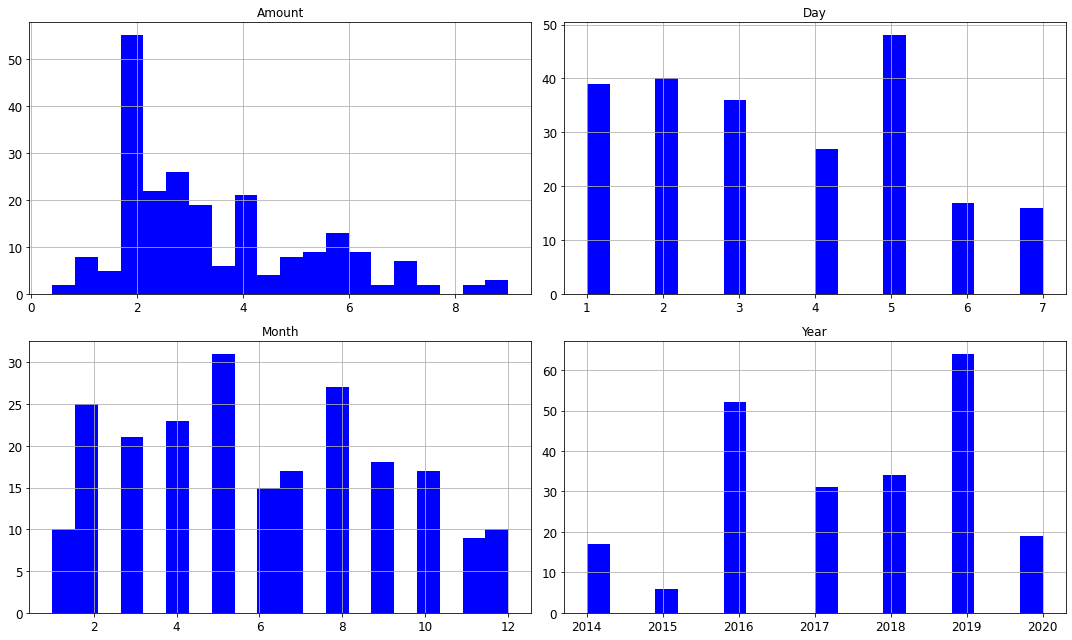

In [155]:
Combined_Food_Cat_new.hist(bins=20, figsize=(15,9), color="b")
save_fig("Combined_Food_Cat_new_histogram")
plt.show()

## Group by the Year

In [156]:
Yearly_train_set = Combined_Food_Cat_new[["Amount", "Year"]].groupby("Year").sum()
Yearly_train_set

,Amount
Year,
2014,96.80
2015,35.60
2016,178.40
2017,108.00
2018,123.75
2019,168.40
2020,58.15


In [157]:
np.array(Yearly_train_set.index)

array([2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [158]:
np.array(Yearly_train_set["Amount"])

array([ 96.8 ,  35.6 , 178.4 , 108.  , 123.75, 168.4 ,  58.15])

In [159]:
Yearly_train_set.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')

In [160]:
Yearly_train_set["Amount"]

Year
2014     96.80
2015     35.60
2016    178.40
2017    108.00
2018    123.75
2019    168.40
2020     58.15
Name: Amount, dtype: float64

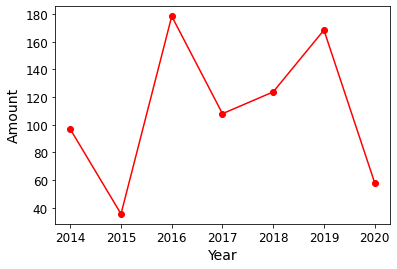

In [161]:
plt.scatter(x=Yearly_train_set.index, y=Yearly_train_set["Amount"], color="r")
plt.plot(Yearly_train_set["Amount"], color="r")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

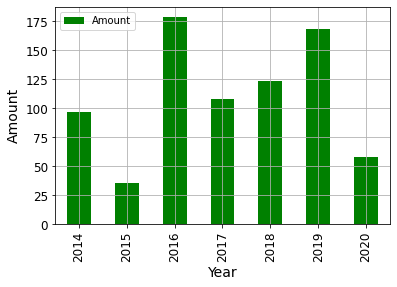

In [162]:
Yearly_train_set.plot(kind="bar", color="g")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

## Group by the Quarterly Period and Food Category

In [163]:
Quarterly_train_set =Combined_Food_Cat_new[["Food Category","Amount","Quarterly Period"]].groupby(["Quarterly Period", "Food Category"]).sum()
Quarterly_train_set.head(10)

Amount
Quarterly Period Food Category        
2014Q2           Beef            11.70
                 Chicken          3.90
                 Fish             6.95
2014Q3           Beef            18.30
                 Chicken          7.80
                 Sausage          6.20
2014Q4           Beef            18.80
                 Chicken         11.05
                 Sausage         12.10
2015Q1           Sausage          3.80

In [164]:
Quarterly_train_set.index[:11]

MultiIndex([('2014Q2',    'Beef'),
            ('2014Q2', 'Chicken'),
            ('2014Q2',    'Fish'),
            ('2014Q3',    'Beef'),
            ('2014Q3', 'Chicken'),
            ('2014Q3', 'Sausage'),
            ('2014Q4',    'Beef'),
            ('2014Q4', 'Chicken'),
            ('2014Q4', 'Sausage'),
            ('2015Q1', 'Sausage'),
            ('2015Q2', 'Chicken')],
           names=['Quarterly Period', 'Food Category'])

In [165]:
pd.DataFrame(Quarterly_train_set["Amount"]).index.values[:6]

array([(Period('2014Q2', 'Q-DEC'), 'Beef'),
       (Period('2014Q2', 'Q-DEC'), 'Chicken'),
       (Period('2014Q2', 'Q-DEC'), 'Fish'),
       (Period('2014Q3', 'Q-DEC'), 'Beef'),
       (Period('2014Q3', 'Q-DEC'), 'Chicken'),
       (Period('2014Q3', 'Q-DEC'), 'Sausage')], dtype=object)

In [166]:
pd.DataFrame(Quarterly_train_set.unstack(level=0))

Amount                                                   \
Quarterly Period 2014Q2 2014Q3 2014Q4 2015Q1 2015Q2 2015Q3 2016Q1 2016Q2   
Food Category                                                              
Beef              11.70   18.3  18.80    NaN    NaN    NaN    3.0  20.10   
Chicken            3.90    7.8  11.05    NaN   17.3    NaN   10.6  27.05   
Desserts            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Fish               6.95    NaN    NaN    NaN    7.1    7.4    NaN    NaN   
Sausage             NaN    6.2  12.10    3.8    NaN    NaN    3.0    NaN   

                                ...                                            \
Quarterly Period 2016Q3 2016Q4  ... 2018Q1 2018Q2 2018Q3 2018Q4 2019Q1 2019Q2   
Food Category                   ...                                             
Beef               9.00   3.00  ...    NaN    NaN    NaN    NaN   12.7   4.60   
Chicken           34.25  31.55  ...   16.0  16.00   26.3    NaN   31.9  18.60   
Desserts            NaN    NaN  ...    NaN    NaN    NaN    1.8    1.4   3.00   
Fish              24.05   8.60  ...    5.6  12.95    8.5   19.1    2.8  39.55   
Sausage            4.20    NaN  ...   11.5    NaN    3.0    3.0    NaN   4.25   

                                              
Quarterly Period 2019Q3 2019Q4 2020Q1 2020Q2  
Food Category                                 
Beef                NaN    NaN   7.80    NaN  
Chicken           12.00   3.00   3.00    NaN  
Desserts           4.10   1.50   3.40    NaN  
Fish                NaN  22.35  11.35   2.00  
Sausage            6.65    NaN  22.45   8.15  

[5 rows x 24 columns]

In [167]:
Quarterly_train_set.describe()

,Amount
count,69.000000
mean,11.146377
std,9.313646
min,1.000000
25%,3.800000
50%,7.800000
75%,16.000000
max,39.550000


In [168]:
Quarterly_train_set["Amount"].sort_values(ascending=False)

Quarterly Period  Food Category
2019Q2            Fish             39.55
2016Q3            Chicken          34.25
2019Q1            Chicken          31.90
2016Q4            Chicken          31.55
2017Q2            Chicken          30.45
                                   ...  
2020Q2            Fish              2.00
2018Q4            Desserts          1.80
2019Q4            Desserts          1.50
2019Q1            Desserts          1.40
2017Q2            Desserts          1.00
Name: Amount, Length: 69, dtype: float64

In [169]:
# plt.figure(figsize=(12,9))
# Quarterly_train_set["Amount"].plot(kind="bar", subplots=True, color="g")
# plt.xlabel("Quarterly Period")
# plt.ylabel("Amount")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [170]:
FoodCat_Quarterly = Quarterly_train_set.unstack(level=1)
FoodCat_Quarterly

Amount                                
Food Category      Beef Chicken Desserts   Fish Sausage
Quarterly Period                                       
2014Q2             11.7    3.90      NaN   6.95     NaN
2014Q3             18.3    7.80      NaN    NaN    6.20
2014Q4             18.8   11.05      NaN    NaN   12.10
2015Q1              NaN     NaN      NaN    NaN    3.80
2015Q2              NaN   17.30      NaN   7.10     NaN
2015Q3              NaN     NaN      NaN   7.40     NaN
2016Q1              3.0   10.60      NaN    NaN    3.00
2016Q2             20.1   27.05      NaN    NaN     NaN
2016Q3              9.0   34.25      NaN  24.05    4.20
2016Q4              3.0   31.55      NaN   8.60     NaN
2017Q1              NaN    2.60      NaN   7.50     NaN
2017Q2             11.6   30.45      1.0   5.50     NaN
2017Q3              NaN   24.75      2.0   5.00    6.80
2017Q4              NaN     NaN      NaN  10.80     NaN
2018Q1              NaN   16.00      NaN   5.60   11.50
2018Q2              NaN   16.00      NaN  12.95     NaN
2018Q3              NaN   26.30      NaN   8.50    3.00
2018Q4              NaN     NaN      1.8  19.10    3.00
2019Q1             12.7   31.90      1.4   2.80     NaN
2019Q2              4.6   18.60      3.0  39.55    4.25
2019Q3              NaN   12.00      4.1    NaN    6.65
2019Q4              NaN    3.00      1.5  22.35     NaN
2020Q1              7.8    3.00      3.4  11.35   22.45
2020Q2              NaN     NaN      NaN   2.00    8.15

Saving figure Quarterly McDonald Expense


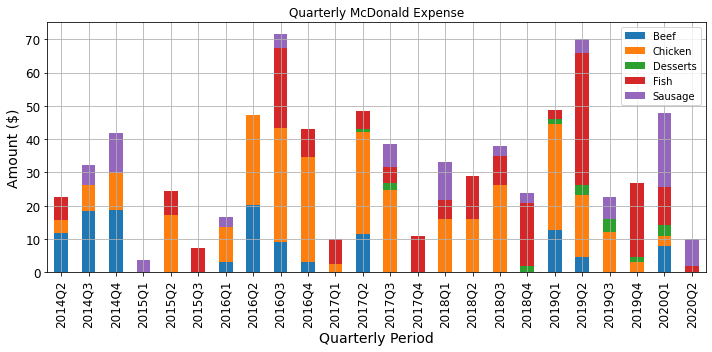

In [171]:
# plt.figure(figsize=(10,9))
FoodCat_Quarterly.plot(kind="bar", stacked=True, figsize=(10,5))
plt.legend(["Beef", "Chicken", "Desserts", "Fish", "Sausage"])
plt.title("Quarterly McDonald Expense")
plt.ylabel("Amount ($)")
plt.grid(True)
save_fig("Quarterly McDonald Expense")
plt.show()

In [172]:
# Converting the index to string
Quarterly_Periods = Quarterly_train_set.index.to_series().astype(str)
Quarterly_Periods

Quarterly Period  Food Category
2014Q2            Beef                 (Period('2014Q2', 'Q-DEC'), 'Beef')
                  Chicken           (Period('2014Q2', 'Q-DEC'), 'Chicken')
                  Fish                 (Period('2014Q2', 'Q-DEC'), 'Fish')
2014Q3            Beef                 (Period('2014Q3', 'Q-DEC'), 'Beef')
                  Chicken           (Period('2014Q3', 'Q-DEC'), 'Chicken')
                                                    ...                   
2020Q1            Desserts         (Period('2020Q1', 'Q-DEC'), 'Desserts')
                  Fish                 (Period('2020Q1', 'Q-DEC'), 'Fish')
                  Sausage           (Period('2020Q1', 'Q-DEC'), 'Sausage')
2020Q2            Fish                 (Period('2020Q2', 'Q-DEC'), 'Fish')
                  Sausage           (Period('2020Q2', 'Q-DEC'), 'Sausage')
Length: 69, dtype: object

In [173]:
# X-axis
print("Shape of Quarterly Periods:",Quarterly_Periods.index.shape)
pd.DataFrame(Quarterly_Periods)

Shape of Quarterly Periods: (69,)


0
Quarterly Period Food Category                                         
2014Q2           Beef               (Period('2014Q2', 'Q-DEC'), 'Beef')
                 Chicken         (Period('2014Q2', 'Q-DEC'), 'Chicken')
                 Fish               (Period('2014Q2', 'Q-DEC'), 'Fish')
2014Q3           Beef               (Period('2014Q3', 'Q-DEC'), 'Beef')
                 Chicken         (Period('2014Q3', 'Q-DEC'), 'Chicken')
...                                                                 ...
2020Q1           Desserts       (Period('2020Q1', 'Q-DEC'), 'Desserts')
                 Fish               (Period('2020Q1', 'Q-DEC'), 'Fish')
                 Sausage         (Period('2020Q1', 'Q-DEC'), 'Sausage')
2020Q2           Fish               (Period('2020Q2', 'Q-DEC'), 'Fish')
                 Sausage         (Period('2020Q2', 'Q-DEC'), 'Sausage')

[69 rows x 1 columns]

In [174]:
# Y-axis
print("Quarterly_train_set for amount",Quarterly_train_set.shape)
Quarterly_train_set

Quarterly_train_set for amount (69, 1)


Amount
Quarterly Period Food Category        
2014Q2           Beef            11.70
                 Chicken          3.90
                 Fish             6.95
2014Q3           Beef            18.30
                 Chicken          7.80
...                                ...
2020Q1           Desserts         3.40
                 Fish            11.35
                 Sausage         22.45
2020Q2           Fish             2.00
                 Sausage          8.15

[69 rows x 1 columns]

Saving figure Scatter plot for Amount spent for each Quarterly Period per Food Category


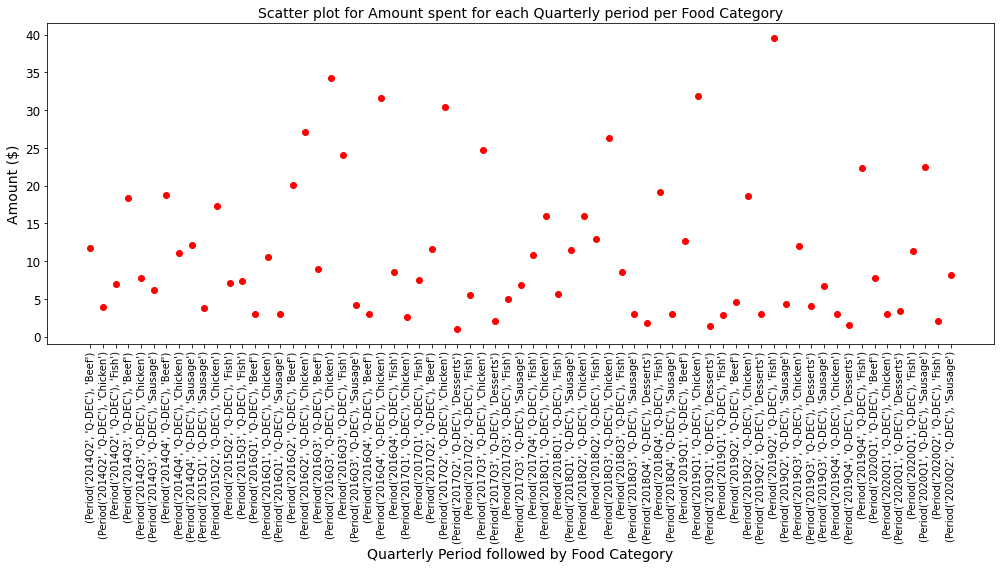

In [249]:
plt.figure(figsize=(14,8))
plt.scatter(x=Quarterly_Periods, y=Quarterly_train_set, color="r")
plt.xticks(np.arange(len(Quarterly_Periods)), Quarterly_Periods, fontsize=10, rotation=90)
plt.title("Scatter plot for Amount spent for each Quarterly period per Food Category", fontsize=14)
plt.xlabel("Quarterly Period followed by Food Category")
plt.ylabel("Amount ($)")
save_fig("Scatter plot for Amount spent for each Quarterly Period per Food Category")
plt.show()

# Quarterly_train_set["Amount"]

In [176]:
Quarterly_Periods.index[:13]

MultiIndex([('2014Q2',    'Beef'),
            ('2014Q2', 'Chicken'),
            ('2014Q2',    'Fish'),
            ('2014Q3',    'Beef'),
            ('2014Q3', 'Chicken'),
            ('2014Q3', 'Sausage'),
            ('2014Q4',    'Beef'),
            ('2014Q4', 'Chicken'),
            ('2014Q4', 'Sausage'),
            ('2015Q1', 'Sausage'),
            ('2015Q2', 'Chicken'),
            ('2015Q2',    'Fish'),
            ('2015Q3',    'Fish')],
           names=['Quarterly Period', 'Food Category'])

## Group by Monthly periods

In [178]:
Monthly_McDonald_exp = Combined_Food_Cat_new[["Notes", "Food Category", "Amount", "Month"]].groupby(["Month", "Food Category"]).sum()
Monthly_McDonald_exp

Amount
Month Food Category        
1     Beef             3.90
      Chicken         12.30
      Desserts         2.90
      Fish             8.40
2     Beef             4.60
      Chicken         29.00
      Desserts         1.90
      Fish            13.85
      Sausage         22.70
3     Beef            15.00
      Chicken         22.80
      Fish             5.00
      Sausage         18.05
4     Beef            21.90
      Chicken         32.10
      Desserts         1.50
      Fish            24.10
      Sausage          7.75
5     Beef            17.60
      Chicken         59.30
      Desserts         2.50
      Fish            26.50
      Sausage          4.65
6     Beef             8.50
      Chicken         21.90
      Fish            23.45
7     Beef             6.00
      Chicken         29.65
      Fish             9.65
      Sausage         16.45
8     Beef             8.00
      Chicken         38.25
      Desserts         5.30
      Fish            18.40
      Sausage          4.20
9     Beef            13.30
      Chicken         37.20
      Desserts         0.80
      Fish            16.90
      Sausage          6.20
10    Beef            13.80
      Chicken         28.45
      Desserts         3.30
      Fish            19.30
      Sausage          6.20
11    Chicken         12.70
      Fish            13.95
      Sausage          8.90
12    Beef             8.00
      Chicken          4.45
      Fish            27.60

In [179]:
Monthly_McDonald_exp.index

MultiIndex([( 1,     'Beef'),
            ( 1,  'Chicken'),
            ( 1, 'Desserts'),
            ( 1,     'Fish'),
            ( 2,     'Beef'),
            ( 2,  'Chicken'),
            ( 2, 'Desserts'),
            ( 2,     'Fish'),
            ( 2,  'Sausage'),
            ( 3,     'Beef'),
            ( 3,  'Chicken'),
            ( 3,     'Fish'),
            ( 3,  'Sausage'),
            ( 4,     'Beef'),
            ( 4,  'Chicken'),
            ( 4, 'Desserts'),
            ( 4,     'Fish'),
            ( 4,  'Sausage'),
            ( 5,     'Beef'),
            ( 5,  'Chicken'),
            ( 5, 'Desserts'),
            ( 5,     'Fish'),
            ( 5,  'Sausage'),
            ( 6,     'Beef'),
            ( 6,  'Chicken'),
            ( 6,     'Fish'),
            ( 7,     'Beef'),
            ( 7,  'Chicken'),
            ( 7,     'Fish'),
            ( 7,  'Sausage'),
            ( 8,     'Beef'),
            ( 8,  'Chicken'),
            ( 8, 'Desserts'),
          

In [177]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [180]:
# Getting the Food Category from the index
month_list = []
foodcat_list = []
for month,foodcat in Monthly_McDonald_exp.index:
    month_list.append(month)
    foodcat_list.append(foodcat)

# foodcat_list[:5]
np.unique(foodcat_list)

array(['Beef', 'Chicken', 'Desserts', 'Fish', 'Sausage'], dtype='<U8')

In [181]:
range(len(month_list))

range(0, 51)

Converting the int to months

In [182]:
# for i in range(len(month_list)):
#     for no in month_list:
#         if no == 1:
#             month_list[i] = "January"
#             i += 1
#         elif no == 2:
#             month_list[i] = "February"
#         elif no == 3:
#             month_list[i] = "March"
#         elif no

# month_list

In [183]:
# Converting the index from int to string format
Monthly_Periods = Monthly_McDonald_exp.index.to_series().astype("str")
Monthly_Periods[0]

"(1, 'Beef')"

In [184]:
# Checking the shape of Monthly_Periods and Monthly_McDonald_exp
print("Shape of Monthly_Periods:",Monthly_Periods.shape)
print("Shape of Monthly_McDonald_exp:", Monthly_McDonald_exp.shape)

Shape of Monthly_Periods: (51,)
Shape of Monthly_McDonald_exp: (51, 1)


In [185]:
# Checking the tuples of the multi index
# Monthly_Periods values are strings
Monthly_Periods.iloc[:1]

Month  Food Category
1      Beef             (1, 'Beef')
dtype: object

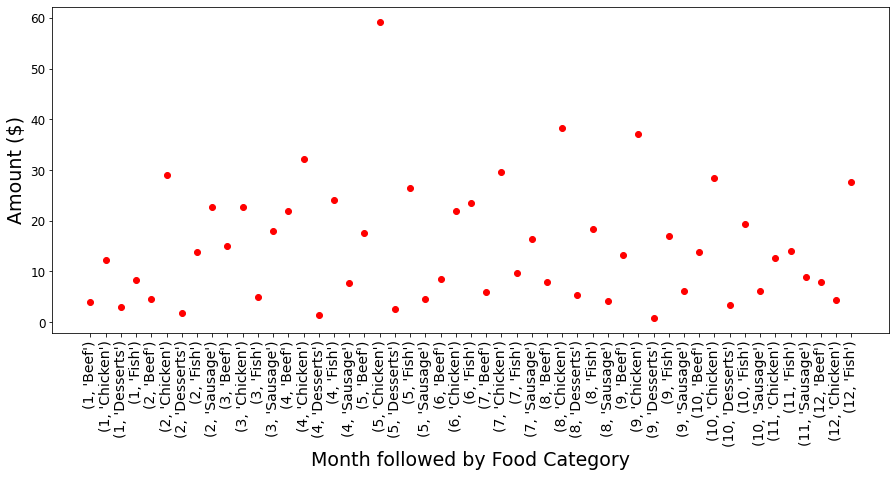

In [258]:
# Plotting the scatter plot for Monthly_McDonald_exp
plt.figure(figsize=(15,6))
plt.scatter(x=Monthly_Periods, y=Monthly_McDonald_exp, color="r")
plt.xticks(np.arange(len(Monthly_Periods)), Monthly_Periods, fontsize=14, rotation=90)

plt.xlabel("Month followed by Food Category", fontsize=19)
plt.ylabel("Amount ($)", fontsize=19)
plt.show()

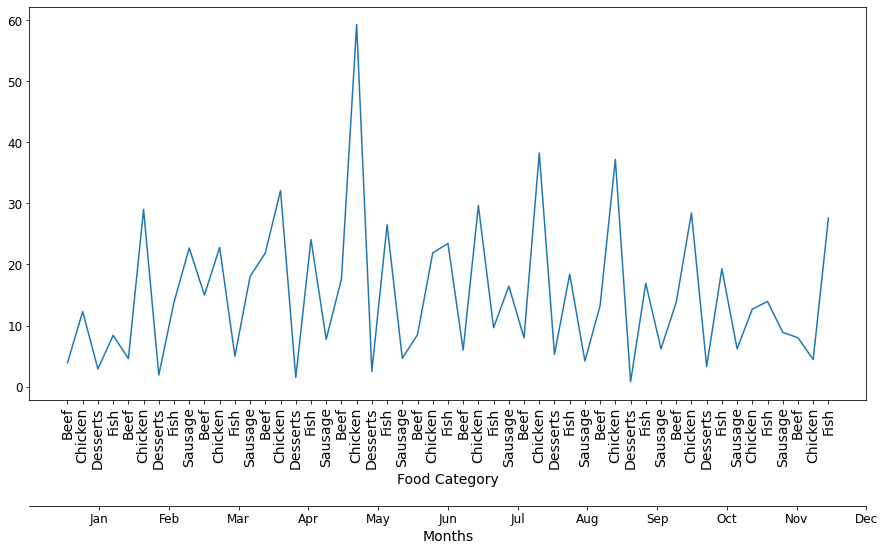

In [187]:
# Plotting the scatter plot for Monthly_McDonald_exp
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.1)

ax1.plot(Monthly_Periods,Monthly_McDonald_exp)
ax1.set_xticklabels(foodcat_list,fontsize=14, rotation=90)
ax1.set_xlabel(r"Food Category")

# location of x-ticks for the secondary axis
new_tick_locations = np.arange(1,13)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
# My Notes: Increases the space between the first and second axis
ax2.spines["bottom"].set_position(("axes", -0.27))

# Turn on the frame for the twin axes, but then hide all
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(months)
ax2.set_xlabel(r"Months")
plt.show()

# plt.scatter(x=Monthly_Periods, y=Monthly_McDonald_exp, color="r")
# plt.xticks(np.arange(len(Monthly_Periods)), foodcat_list, fontsize=14, rotation=90)

# plt.xlabel("Month followed by Food Category", fontsize=19)
# plt.ylabel("Amount ($)", fontsize=19)
# plt.show()

In [188]:
Monthly_FoodCat = Monthly_McDonald_exp.unstack(level=1)
Monthly_FoodCat

Amount                                
Food Category   Beef Chicken Desserts   Fish Sausage
Month                                               
1                3.9   12.30      2.9   8.40     NaN
2                4.6   29.00      1.9  13.85   22.70
3               15.0   22.80      NaN   5.00   18.05
4               21.9   32.10      1.5  24.10    7.75
5               17.6   59.30      2.5  26.50    4.65
6                8.5   21.90      NaN  23.45     NaN
7                6.0   29.65      NaN   9.65   16.45
8                8.0   38.25      5.3  18.40    4.20
9               13.3   37.20      0.8  16.90    6.20
10              13.8   28.45      3.3  19.30    6.20
11               NaN   12.70      NaN  13.95    8.90
12               8.0    4.45      NaN  27.60     NaN

In [189]:
# Index
Monthly_FoodCat.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

In [190]:
# Columns
Monthly_FoodCat.columns

MultiIndex([('Amount',     'Beef'),
            ('Amount',  'Chicken'),
            ('Amount', 'Desserts'),
            ('Amount',     'Fish'),
            ('Amount',  'Sausage')],
           names=[None, 'Food Category'])

In [191]:
# Getting a specified column for each Food Category 
Monthly_FoodCat[[('Amount', 'Chicken'), ('Amount', 'Fish')]]

Amount       
Food Category Chicken   Fish
Month                       
1               12.30   8.40
2               29.00  13.85
3               22.80   5.00
4               32.10  24.10
5               59.30  26.50
6               21.90  23.45
7               29.65   9.65
8               38.25  18.40
9               37.20  16.90
10              28.45  19.30
11              12.70  13.95
12               4.45  27.60

Saving figure Monthly expense for each Month and Food Category in McDonald


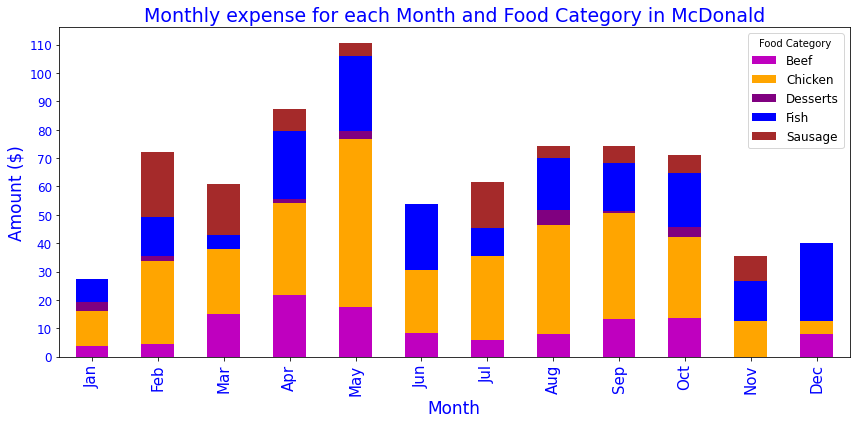

In [192]:
# plt.figure(figsize=(100,100))
Monthly_FoodCat.plot(kind="bar", stacked=True, figsize=(12,6), color=["m", "orange", "Purple", "blue", "brown"])
plt.legend(["Beef", "Chicken", "Desserts", "Fish", "Sausage"], loc='best', title="Food Category", fontsize=12)
plt.xticks(np.arange(len(Monthly_FoodCat.index)), months, fontsize=15, color="b")
plt.yticks(np.arange(0,120, 10), color="b")
plt.title("Monthly expense for each Month and Food Category in McDonald", fontsize=19, color="blue")
plt.xlabel("Month",fontsize=17, color="b")
plt.ylabel("Amount ($)", fontsize=17, color="b")
save_fig("Monthly expense for each Month and Food Category in McDonald")
plt.show()

In [193]:
# Converting MonthlyFood_Cat index from int to string
Monthly_FoodCat_Index_Str = Monthly_FoodCat.index.astype("str")
Monthly_FoodCat_test = Monthly_FoodCat.set_index(Monthly_FoodCat_Index_Str)
Monthly_FoodCat_test.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object', name='Month')

In [194]:
Monthly_FoodCat.index.shape

(12,)

In [195]:
# Shape of Monthly_FoodCat
Monthly_FoodCat.shape

(12, 5)

In [196]:
Monthly_Periods.index

MultiIndex([( 1,     'Beef'),
            ( 1,  'Chicken'),
            ( 1, 'Desserts'),
            ( 1,     'Fish'),
            ( 2,     'Beef'),
            ( 2,  'Chicken'),
            ( 2, 'Desserts'),
            ( 2,     'Fish'),
            ( 2,  'Sausage'),
            ( 3,     'Beef'),
            ( 3,  'Chicken'),
            ( 3,     'Fish'),
            ( 3,  'Sausage'),
            ( 4,     'Beef'),
            ( 4,  'Chicken'),
            ( 4, 'Desserts'),
            ( 4,     'Fish'),
            ( 4,  'Sausage'),
            ( 5,     'Beef'),
            ( 5,  'Chicken'),
            ( 5, 'Desserts'),
            ( 5,     'Fish'),
            ( 5,  'Sausage'),
            ( 6,     'Beef'),
            ( 6,  'Chicken'),
            ( 6,     'Fish'),
            ( 7,     'Beef'),
            ( 7,  'Chicken'),
            ( 7,     'Fish'),
            ( 7,  'Sausage'),
            ( 8,     'Beef'),
            ( 8,  'Chicken'),
            ( 8, 'Desserts'),
          

In [197]:
# Monthly_FoodCat.plot(kind="scatter",x=('Amount', 'Chicken'), y=Monthly_FoodCat.index,figsize=(6,5))
# plt.legend(["Beef", "Chicken", "Desserts", "Fish", "Sausage"])
# # plt.xticks(np.arange(len(Monthly_FoodCat.index)), Monthly_FoodCat.index)
# plt.xlabel("Month")
# plt.ylabel("Amount ($)")
# plt.show()

In [198]:
# months_col = pd.date_range("1/01/12", freq="M", periods=12)
# months_col = months_col.month_name()
# months_col

In [199]:
# Monthly_McDonald_exp.set_index(months_col, inplace=True)

In [200]:
# Monthly_McDonald_exp

In [201]:
# Monthly_McDonald_exp.describe()

In [202]:
# Monthly_McDonald_exp["Amount"].sort_values(ascending=False)

In [203]:
# Monthly_McDonald_exp["Amount"].plot(kind="bar")
# plt.grid(True)
# plt.show()

## Group by Daily period

In [204]:
McDonald_Exp_Daily = Combined_Food_Cat_new[["Food Category", "Day", "Amount"]].groupby("Day").sum()
McDonald_Exp_Daily

,Amount
Day,
1,124.50
2,125.35
3,107.30
4,104.05
5,166.35
6,69.55
7,72.00


In [205]:
McDonald_Exp_Daily.set_index([["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]], inplace=True)

In [206]:
McDonald_Exp_Daily["Amount"].sort_values(ascending=False)

Friday       166.35
Tuesday      125.35
Monday       124.50
Wednesday    107.30
Thursday     104.05
Sunday        72.00
Saturday      69.55
Name: Amount, dtype: float64

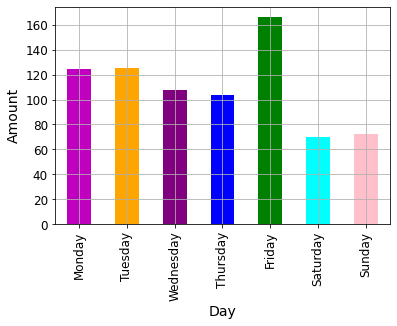

In [207]:
McDonald_Exp_Daily["Amount"].plot(kind="bar", color=["m", "orange", "Purple", "blue", "g", "cyan", "pink"])
plt.xlabel("Day")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

My Notes: Most Likely to spend on Fridays and Mondays and Tuesday

# Group by the Food Cat category

In [208]:
Food_Cat = Combined_Food_Cat_new[["Food Category", "Amount"]].groupby(["Food Category"]).sum().sort_values(by="Amount", ascending=False)
Food_Cat_percentage = Food_Cat / Food_Cat["Amount"].sum() *100
# train_set_notes
Food_Cat_Groupby = pd.DataFrame(Combined_Food_Cat_new["Amount"].sort_values(ascending=False))[:5]
Food_Cat_percentage

,Amount
Food Category,
Chicken,42.660252
Fish,26.927578
Beef,15.680666
Sausage,12.365102
Desserts,2.366402


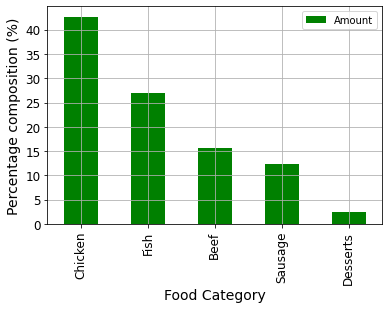

In [209]:
Food_Cat_percentage.plot(kind="bar", color="g")
plt.ylabel("Percentage composition (%)")
plt.grid(True)
plt.show()

## Group by Food Category and Month in 2018

In [210]:
Combined_Food_Cat_new[["Year", "Food Category"]].groupby("Food Category").mean()
# .sort_values(by="Month")

,Year
Food Category,
Beef,2016.548387
Chicken,2017.298077
Desserts,2018.642857
Fish,2017.862745
Sausage,2017.869565


In [211]:
Year = Combined_Food_Cat_new["Year"]
McDonald_Exp_2018= Combined_Food_Cat_new.query("@Year == 2018", engine="numexpr").sort_values(by="Amount", ascending=False)
McDonald_Exp_2018.head()

,Notes,Amount,Food Category,Day,Month,Quarterly Period,Year
ID,,,,,,,
1497,McDonald's chicken prosperity meal,9.00,Chicken,4,2,2018Q1,2018
1036,McDonald's Double Filet O Fish meal,7.35,Fish,5,6,2018Q2,2018
860,McDonald's Ha Ha Special + green tea,7.25,Chicken,2,8,2018Q3,2018
1007,McDonald's Ha Ha Cheong Gai Burger,6.05,Chicken,3,7,2018Q3,2018
841,McDonald's Filet O Fish meal with criss cut fries,5.70,Fish,6,8,2018Q3,2018


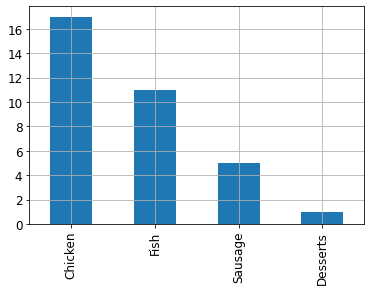

In [212]:
McDonald_Exp_2018["Food Category"].value_counts().plot(kind="bar")
plt.grid(True)
plt.show()

In [213]:
# Food_Cat_percentage.plot(kind="bar", title="Consumption levels of each Food Categories")
# plt.show()

## Split the dataset into Training and Test sets (Extra)

80% into training set, 20% into test set

In [214]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(McDonald_Exp, test_size=0.2, shuffle=True)

In [215]:
# print("Number of training sets:",len(train_set))
# print("Number of test sets:", len(test_set))

In [216]:
# train_set.head()

In [217]:
# test_set.head()

## Stratified Shuffle Split

Need to split between the food categories for the training and test sets. The ratios of the food categories for the training and test sets need to be the same.

In [218]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Combined_Food_Cat_new, Combined_Food_Cat_new["Food Category"]):
    print("Train_index:",train_index)
    print()
    print("Test_index:",test_index)
    strat_train_set = Combined_Food_Cat_new.iloc[train_index]
    strat_test_set = Combined_Food_Cat_new.iloc[test_index]

Train_index: [179 160  56 182 105  74 222 207  18  70  72 206 187 138 205 152  27 161
  37 176  76 135 171  54 193  59   5  26 198  96 212  97 122 124  30   1
 125  86  67  49 131 214 208  28   0 189 100 106 116 107  61  93 156 130
  32  34   8  64 180 170  85  78  71  45 120 126  53  39  57 188 196  10
  50 151 144  80  58 163 101 115 217  62  75  13  91 197  82 114  88 165
 119 172  77  19 195 174  42 192 184  92 162   9 145 118  94 216 104 150
 142  44 203 173 155 191 211 134 220   7 136  21 166  81 141 168 137 153
 157 117  40  65  17   2 169 183 123 127   6 186 213 139 209  46 200  83
  60 175  23 132  79  68  16 221 133  35 218 111  20  24 194 102 113  43
  98  25  33  84 210  73 201 129  11  15  89 148  14 158 109   4]

Test_index: [ 29 140  48  47 108 219 121 143 202 204 147   3 181 167  90 128 178  69
  66  41  12 103 146  87  99  55 112  95  31  63 185 149 215  22 159 199
 190  52  36  38  51 177 154 164 110]


## Checking if the Food Category ratios are the same

In [219]:
strat_train_set["Food Category"].value_counts() / len(strat_train_set)

Chicken     0.466292
Fish        0.230337
Beef        0.140449
Sausage     0.101124
Desserts    0.061798
Name: Food Category, dtype: float64

In [220]:
strat_test_set["Food Category"].value_counts() / len(strat_test_set)

Chicken     0.466667
Fish        0.222222
Beef        0.133333
Sausage     0.111111
Desserts    0.066667
Name: Food Category, dtype: float64

In [221]:
Combined_Food_Cat_new["Food Category"].value_counts() / len(Combined_Food_Cat_new)

Chicken     0.466368
Fish        0.228700
Beef        0.139013
Sausage     0.103139
Desserts    0.062780
Name: Food Category, dtype: float64

In [222]:
strat_train_set.head()

,Notes,Amount,Food Category,Day,Month,Quarterly Period,Year
ID,,,,,,,
284,McDonald's cheese burger,2.3,Beef,5,2,2019Q1,2019
1408,McDonald's sausage mcmuffin,3.0,Sausage,3,3,2018Q1,2018
4006,McDonald's McChicken Burger,2.0,Chicken,2,8,2019Q3,2019
2022,McDonald's mcdouble burger,2.6,Beef,6,5,2017Q2,2017
2026,McDonald's 4pc mcwings,4.0,Chicken,4,5,2017Q2,2017


# Getting only Months and Amount

In [223]:
strat_train_set_test = strat_train_set[[ "Month","Food Category","Amount"]]
strat_train_set_test

,Month,Food Category,Amount
ID,,,
284,2,Beef,2.30
1408,3,Sausage,3.00
4006,8,Chicken,2.00
2022,5,Beef,2.60
2026,5,Chicken,4.00
...,...,...,...
4972,5,Sausage,4.65
3700,5,Fish,5.40
523,11,Sausage,3.00


# Creating the predictors and labels

## Predictors

Predictors are `Food Category` and `Month`

In [224]:
# McDonald_Exp_Predictors = strat_train_set_test["Month"].values.reshape(-1,1).astype('float64')
McDonald_Exp_Predictors = strat_train_set_test[["Food Category","Month"]].values
McDonald_Exp_Predictors[:6]

array([['Beef', 2],
       ['Sausage', 3],
       ['Chicken', 8],
       ['Beef', 5],
       ['Chicken', 5],
       ['Chicken', 3]], dtype=object)

Shape of `McDonald_Exp_Predictors`

In [225]:
McDonald_Exp_Predictors.shape

(178, 2)

## Labels

Changing the `Amount` to an array with 178,1 shape

In [226]:
# McDonald_Exp_Labels_raw = strat_train_set["Amount"].copy().values.reshape(-1,1)
McDonald_Exp_Labels_raw = strat_train_set_test["Amount"].values.reshape(-1,1)
McDonald_Exp_Labels_raw.dtype

dtype('float64')

Shape of `McDonald_Exp_Labels_raw`

In [227]:
McDonald_Exp_Labels_raw.shape

(178, 1)

In [228]:
McDonald_Exp_Labels_raw[:5]

array([[2.3],
       [3. ],
       [2. ],
       [2.6],
       [4. ]])

# Creating the Pipeline to transform the dataset

1) Need to *Center the data* on `amount` column

2) Transform `Day`,`Month`,`Quarterly Period` and `Year` columns using one hot encoding 

Numerical Attributes:

1) `Amount`

Categorical Attributes:

1) `Day`

2) `Month`

3) `Quarterly Period`

4) `Year`

5) `Food Category`

## Creating the numerical attributes pipeline

Numerical Attribute is `Amount`

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [230]:
# Eg:
McDonald_Exp_Labels_raw.shape

(178, 1)

In [231]:
McDonald_Exp_Labels_raw[:6]

array([[2.3],
       [3. ],
       [2. ],
       [2.6],
       [4. ],
       [2.2]])

In [232]:
McDonald_Exp_Labels_Transform = num_pipeline.fit_transform(McDonald_Exp_Labels_raw)
McDonald_Exp_Labels_Transform.shape

(178, 1)

In [233]:
McDonald_Exp_Labels_Transform[:6]

array([[-0.63176115],
       [-0.25376624],
       [-0.79375896],
       [-0.46976333],
       [ 0.28622648],
       [-0.68576042]])

## Creating the Categorical Attributes pipeline

Categorical attribute is `Month` and `Food Category`

In [234]:
McDonald_Exp_Predictors.shape

(178, 2)

In [235]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
McDonald_exp_cat_1hot = cat_encoder.fit_transform(McDonald_Exp_Predictors)
McDonald_exp_cat_1hot

<178x17 sparse matrix of type '<class 'numpy.float64'>'
	with 356 stored elements in Compressed Sparse Row format>

In [236]:
cat_encoder.categories_

[array(['Beef', 'Chicken', 'Desserts', 'Fish', 'Sausage'], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object)]

In [237]:
McDonald_exp_cat_1hot.toarray()[0]

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Creating the full pipeline (Extra)

Getting the list of `num_attribs` and `cat_attribs`

In [238]:
num_attribs = list(McDonald_Exp_Labels_raw)
num_attribs[:5]

[array([2.3]), array([3.]), array([2.]), array([2.6]), array([4.])]

In [239]:
# cat_attribs = list(McDonald_exp_cat)
# cat_attribs[:5]

In [240]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline,["Amount"]),
    ("cat", OneHotEncoder(), ["Month"])
])

In [241]:
McDonald_Exp_Labels_raw.dtype

dtype('float64')

In [242]:
McDonald_Exp_prepared = full_pipeline.fit_transform(strat_train_set)

In [243]:
McDonald_Exp_prepared.toarray()[:1]

array([[-0.63176115,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [244]:
len(McDonald_Exp_prepared.toarray())

178

In [245]:
strat_train_set.iloc[:,2:5][:5]

,Food Category,Day,Month
ID,,,
284,Beef,5,2
1408,Sausage,3,3
4006,Chicken,2,8
2022,Beef,6,5
2026,Chicken,4,5


In [246]:
strat_train_set

,Notes,Amount,Food Category,Day,Month,Quarterly Period,Year
ID,,,,,,,
284,McDonald's cheese burger,2.30,Beef,5,2,2019Q1,2019
1408,McDonald's sausage mcmuffin,3.00,Sausage,3,3,2018Q1,2018
4006,McDonald's McChicken Burger,2.00,Chicken,2,8,2019Q3,2019
2022,McDonald's mcdouble burger,2.60,Beef,6,5,2017Q2,2017
2026,McDonald's 4pc mcwings,4.00,Chicken,4,5,2017Q2,2017
...,...,...,...,...,...,...,...
4972,McDonald's breakfast wrap sausage,4.65,Sausage,2,5,2020Q2,2020
3700,McDonald's Double Filet O Fish,5.40,Fish,5,5,2019Q2,2019
523,McDonald's sausage mcmuffin,3.00,Sausage,1,11,2018Q4,2018


# Select and train a model

## Using Linear Regression

Using `Food Category` and `Month` as predictors to predict the `amount`

In [ ]:
McDonald_exp_cat_1hot.shape

In [ ]:
McDonald_Exp_Labels_Transform.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform)
# lin_reg.fit(McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform.ravel())

In [ ]:
print("Linear Regression intercept:",lin_reg.intercept_)
print("Linear Regression Coefficients:",lin_reg.coef_)

In [ ]:
McDonald_Exp_Labels_Transform[:6]

In [ ]:
lin_pred[:6]

In [ ]:
lin_reg.get_params(deep=True)

In [ ]:
some_data = McDonald_exp_cat_1hot[:5]
some_data.toarray()

In [ ]:
some_labels = McDonald_Exp_Labels_Transform[:5]
some_labels

In [ ]:
# some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions:", lin_reg.predict(some_data))

In [ ]:
print("Labels:", some_labels)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean scores:", scores.mean())
    print("Standard Deviation of scores:", scores.std())

# Plotting the graph of the model

In [ ]:
np.unique(strat_train_set_test.Month)

In [ ]:
np.unique(strat_train_set_test["Food Category"])

In [ ]:
# Linear Regression Coefficients
lin_reg.coef_

In [ ]:
# Linear Regression Intercept
lin_reg.intercept_

In [ ]:
Monthly_Periods[2]

In [ ]:
Monthly_Periods.shape

In [ ]:
# X-axis, 
Monthly_McDonald_exp[:5]

In [ ]:
len(McDonald_exp_cat_1hot.toarray())

In [ ]:
McDonald_exp_cat_1hot.shape

In [ ]:
# y-axis, Predicted Values
lin_pred = lin_reg.predict(McDonald_exp_cat_1hot)
lin_pred.shape

In [ ]:
lin_pred[:6]

Drawing the plots for the coefficients

In [ ]:
months

In [ ]:
np.unique(foodcat_list)

[array(['Beef', 'Chicken', 'Desserts', 'Fish', 'Sausage']

In [ ]:
lin_reg.coef_.T.shape

In [ ]:
np.arange(len(lin_reg.coef_.T)).reshape(-1,1).shape

In [ ]:
# Scatter plots for the coefficients
plt.figure(figsize=(12,6))
plt.scatter(x=np.arange(len(lin_reg.coef_.T)).reshape(-1,1), y=lin_reg.coef_.T)
plt.plot(lin_reg.coef_.T)

plt.xticks(np.arange(0,18),["Beef", "Chicken", "Desserts", "Fish", "Sausage"] + months, rotation=90)
plt.title("Plotting the coefficient of the Linear Regression Model", fontsize=14)
plt.show()

In [ ]:
lin_reg.coef_.T

Drawing the plots for the prediction values

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=np.arange(len(lin_pred)), y=lin_pred, color="blue", marker="x")

plt.title("Scatter plot for predicted values", fontsize=14)
plt.xlabel("Instances")
plt.ylabel("Amount")
plt.show()

In [ ]:
np.arange(1,len(lin_reg.coef_.T)+1)

In [ ]:
a = zip(month_list,foodcat_list)
list(a)[:6]

In [ ]:
Monthly_Periods[:6]

In [ ]:
(lin_reg.intercept_ + lin_reg.coef_ * )

In [ ]:
len(McDonald_Exp_Labels_Transform)

In [ ]:
np.arange(lin_pred.shape[0]).reshape(-1,1).shape

In [ ]:
lin_pred.shape

In [ ]:
np.linspace(-3,3,178)[-1]

# Stopped here 19/6/2020

In [ ]:
# Plotting the scatter plot for Monthly_McDonald_exp
plt.figure(figsize=(15,6))
plt.scatter(x=np.arange(len(McDonald_exp_cat_1hot.toarray())), y=McDonald_Exp_Labels_Transform, color="r")
# Shows Predicted values
plt.plot(np.arange(lin_pred.shape[0]),lin_pred)
plt.plot(np.arange(178),np.linspace(-1.5,1.3,178).reshape(-1,1))
# plt.plot(np.arange(len(McDonald_exp_cat_1hot.toarray())), lin_reg.intercept_ + lin_reg.coef_ * np.arange(len(McDonald_exp_cat_1hot.toarray())), "-")
# plt.xticks(np.arange(len(Monthly_Periods)), Monthly_Periods.values, fontsize=14, rotation=90)

plt.title("Truth values and Predicted values", fontsize=14)
plt.legend(["Predicted", "Linear Slope", "Truth"], fontsize=11)
plt.xlabel("Instance number", fontsize=19)
plt.ylabel("Amount ($)", fontsize=19)
plt.show()

## Evaluating with RMSE

Evaluating the training set

In [ ]:
from sklearn.metrics import mean_squared_error
McDonald_Exp_predictions = lin_reg.predict(McDonald_exp_cat_1hot)

In [ ]:
lin_mse =mean_squared_error(McDonald_Exp_Labels_Transform, McDonald_Exp_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

## Alternative

In [ ]:
# lin_rmse_1 = mean_squared_error(McDonald_Exp_Labels, McDonald_Exp_predictions, squared=False)
# lin_rmse_1

## Evaluating linear regression RMSE scores using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X =McDonald_exp_cat_1hot, y =McDonald_Exp_Labels_Transform,
                            scoring="neg_mean_squared_error", cv=10)

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
display_scores(lin_rmse_scores)


# Calculating R^2 scores

In [ ]:
# from sklearn.metrics import r2_score
# R_2_lin = r2_score(McDonald_Exp_Labels_Transform, McDonald_exp_cat_1hot.toarray())
# R_2_lin

In [ ]:
McDonald_exp_cat_1hot.toarray().shape

In [ ]:
McDonald_Exp_predictions.shape

In [ ]:
# Evaluate with cross validating using r2_score
lin_r2_score = cross_val_score(lin_reg, y=np.array(McDonald_Exp_Labels_Transform).reshape(-1, 1), X=McDonald_Exp_predictions.reshape(-1, 1), 
                              scoring="r2", cv=10)
display_scores(lin_r2_score)

## Evaluating Adjusted R^2 scores (Extra)

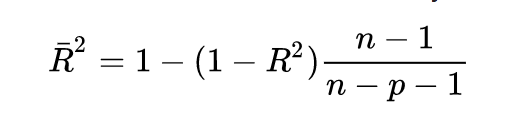

where n is number of observations in sample and p is number of independent variables in model

In [ ]:
n = len(McDonald_Exp_new)
p = len(McDonald_Exp_new.columns) -1

print("p:", p)
print("n:", n)

In [ ]:
def Adjusted_R_2(r2_score,n,p):
    x = 1 - (1-r2_score) * (n-1) / (n-p-1)
    return x

In [ ]:
lin_Adjusted_R_2 = Adjusted_R_2(lin_r2_score,n,p)

In [ ]:
display_scores(lin_Adjusted_R_2)

## Plotting the learning curve in Linear Regression

In [ ]:
# Plotting the errors for each training and validation instances
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X = X.toarray()
#     sss_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#     for train_index, val_index in sss_1.split(X, y):
#         X_train, X_val = X[train_index], X[val_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
    train_errors, val_errors = [], []
    for m in (1, len(X_train)): # Getting the total length of the training set
        model.fit(X_train[:m], y_train[:m]) # Fit the model using the training set
        y_train_predict = model.predict(X_train[:m]) # Making predictions using the training set
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
#     plt.plot(train_errors, "r-+", linewidth=2, label="train")
#     plt.plot(val_errors, "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    

In [ ]:
lin_reg_eg = LinearRegression()
plot_learning_curve(lin_reg_eg, McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform)
plt.grid(True)

For the validation set, as the model is constantly seeing the **entire validation set** instead of each instances for every loop, the error rate continues to decrease over time as the model is learning

For the training set, in the beginning there's only one training instance, so the model fits perfectly. As the instances are being added, the error rate increases.

## Plotting the Graph

In [ ]:
# plt.boxplot(McDonald_Exp_new["Amount"])
# plt.xlabel("Amount")
# plt.ylabel("Amount")
# plt.show()

Testing out stratifieid shuffle split

Split between `predictor` X = McDonald_Exp_new and `label` y = McDOnald_Exp_Labels

In [ ]:
# sss_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, val_index in sss_1.split(McDonald_Exp_new, McDonald_Exp_Labels):
#     X_train, X_val = McDonald_Exp_new.iloc[train_index], McDonald_Exp_new.iloc[val_index]
#     y_train, y_val = McDonald_Exp_Labels.iloc[train_index], McDonald_Exp_Labels.iloc[val_index]

In [ ]:
# print("X_train",len(X_train))
# print("X_test", len(X_val))
# print("y_train", len(y_train))
# print("y_test", len(y_val))

In [ ]:
# X_train.iloc[:3]

In [ ]:
# y_train.iloc[:3]

## Using Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform)

## Evaluating with RMSE

In [ ]:
tree_some_data = McDonald_exp_cat_1hot[:5]
tree_some_data

In [ ]:
tree_some_labels = McDonald_Exp_Labels_Transform[:5]
tree_some_labels

In [ ]:
McDonald_Exp_predictions_tree = tree_reg.predict(tree_some_data)
tree_mse = mean_squared_error(tree_some_labels, McDonald_Exp_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## Evaluating decision trees using Cross-Validation

In [ ]:
McDonald_exp_cat_1hot.toarray().shape

In [ ]:
McDonald_Exp_Labels_Transform.shape

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform,
                        scoring="neg_mean_squared_error", cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [ ]:
display_scores(tree_rmse_scores)

The average root mean squared error of the **Cross Validation Sets** for *Linear regression* is **0.9479** is lower compared to the root mean squared error for *Decision tree* score of **1.0511**.

The *Decision tree* model is overfitting  badly as initally the first value was **0.269**, but upon testing with Cross-Validation sets, the value is **1.01**.

## Plotting the curve using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_eg = DecisionTreeRegressor()
plot_learning_curve(tree_reg_eg, McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform)
plt.grid(True)

## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform.ravel())

## Evaluating with RMSE

In [ ]:
McDonald_Exp_predictions_forest = forest_reg.predict(McDonald_exp_cat_1hot)
forest_mse = mean_squared_error(McDonald_Exp_Labels_Transform, McDonald_Exp_predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

## Evaluating Random Forest with cross validation sets 

In [ ]:
from sklearn.model_selection import cross_val_score

random_forest_scores = cross_val_score(forest_reg, McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform.ravel(),
                                      scoring="neg_mean_squared_error", cv=10)

In [ ]:
random_forest_rmse_scores = np.sqrt(-random_forest_scores)

In [ ]:
display_scores(random_forest_rmse_scores)

## Plotting the curve using Random Forest

In [ ]:
forest_reg_1 = RandomForestRegressor()
plot_learning_curve(forest_reg_1, McDonald_exp_cat_1hot, McDonald_Exp_Labels_Transform.ravel())
plt.grid(True)

## Complete RMSE scores for the models

In [ ]:
print("RMSE scores for Linear Regression:", np.around(lin_rmse,4))
print("RMSE scores for Decision Trees:", np.around(tree_rmse,4))
print("RMSE scores for Random Forest:", np.around(forest_rmse,4))

## Complete Cross validation RMSE scores for the models

In [ ]:
a = "Mean Cross validation RMSE scores for "

In [ ]:
print(a+"Linear Regression", np.around(lin_rmse_scores.mean(),4))
print(a+"Decision Trees:", np.around(tree_rmse_scores.mean(),4))
print(a+"Random Forest:", np.around(random_forest_rmse_scores.mean(),4))

## Calculating the difference in % between RMSE scores and Cross Validation RMSE scores

In [ ]:
(lin_rmse_scores.mean() - lin_rmse) / lin_rmse * 100

In [ ]:
(tree_rmse_scores.mean() - tree_rmse) / tree_rmse * 100

In [ ]:
(random_forest_rmse_scores.mean() - forest_rmse) / forest_rmse * 100

|Model Type|RMSE Scores| Cross_val RMSE Scores|Difference in %|Cross_val R^2 scores|Cross_val Adjusted R^2 scores|
|------------------|-------|--------------------------------------|----------------------|-------------|------------------------|
|Linear Regression|1.518|1.9504|28.48| 0.16|0.14|
|Decision Trees|0.0|0.5506|55|NA|NA|
|Random Forest|1.8825|101.16|101.16|NA|NA|

The average root mean squared error of the **Cross Validation Sets** for *Linear regression* is **0.9479** is higher compared to the root mean squared error for *Linear regression* score of **0.6919**.

The *Decision tree* model is overfitting  badly as initally the first value was **0.269**, but upon testing with Cross-Validation sets, the value is **1.01**.

**7/06/2020**

The models are overfitting. I'm only selecting Decision Trees as it has the lowest score among the model.

Need to simplify the model with fewer attributes/parameters, or constraining the model (Regularization)

Drop two features: 

`Quarterly Period`
`Year`

Getting the various types of scores

In [ ]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

## Other notes